In [ ]:
library('dplyr')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Statistica su intero dataset anemometro

In [ ]:
file_in = 'TOA5_Sonic_Anemometer_G2.dat'

# Lettura dati anemometro sonico
data = read.table(file_in, sep = ',', na.string=NA, as.is=TRUE, header = F, skip = 4,
                    col.names = c("TIMESTAMP","RECORD","u","v","w","T.sonica"))

data = data %>% select(c('TIMESTAMP', 'u', 'v', 'w', 'T.sonica'))

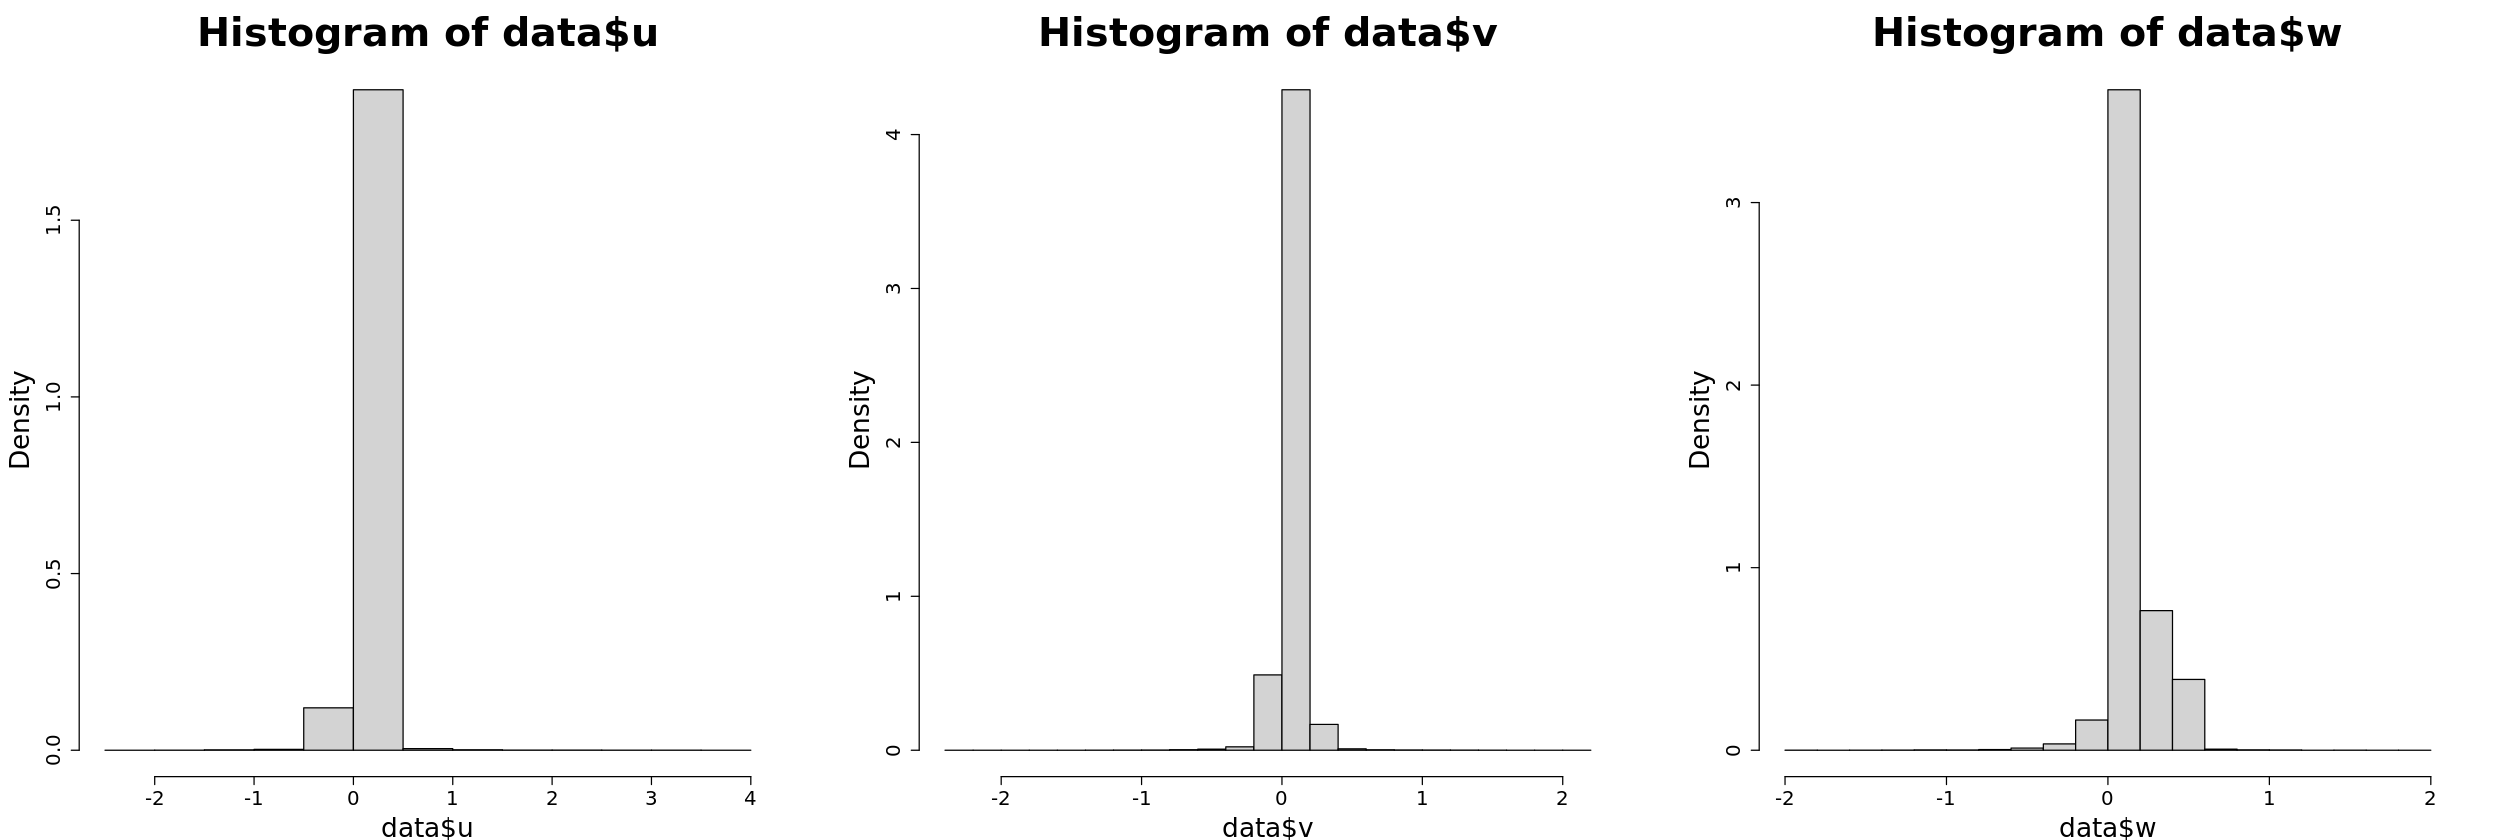

In [ ]:
options(repr.plot.width = 21, repr.plot.height = 7)
par(mfrow = c(1,3), cex.main = 3, cex.lab = 2, cex.axis = 1.5, mar = c(4,5,4,4))
u = hist(data$u, freq=F)
hist(data$v, freq=F)
hist(data$w, freq=F)


Ho usato la funzione che non abbiamo usato per GPM perché dava problemi per i counts negativi. In questo caso il problema non si pone perché le x possono anche essere negative, ma dimmi cosa ne pensi. In caso possiamo riutilizzare le frequenze dei counts

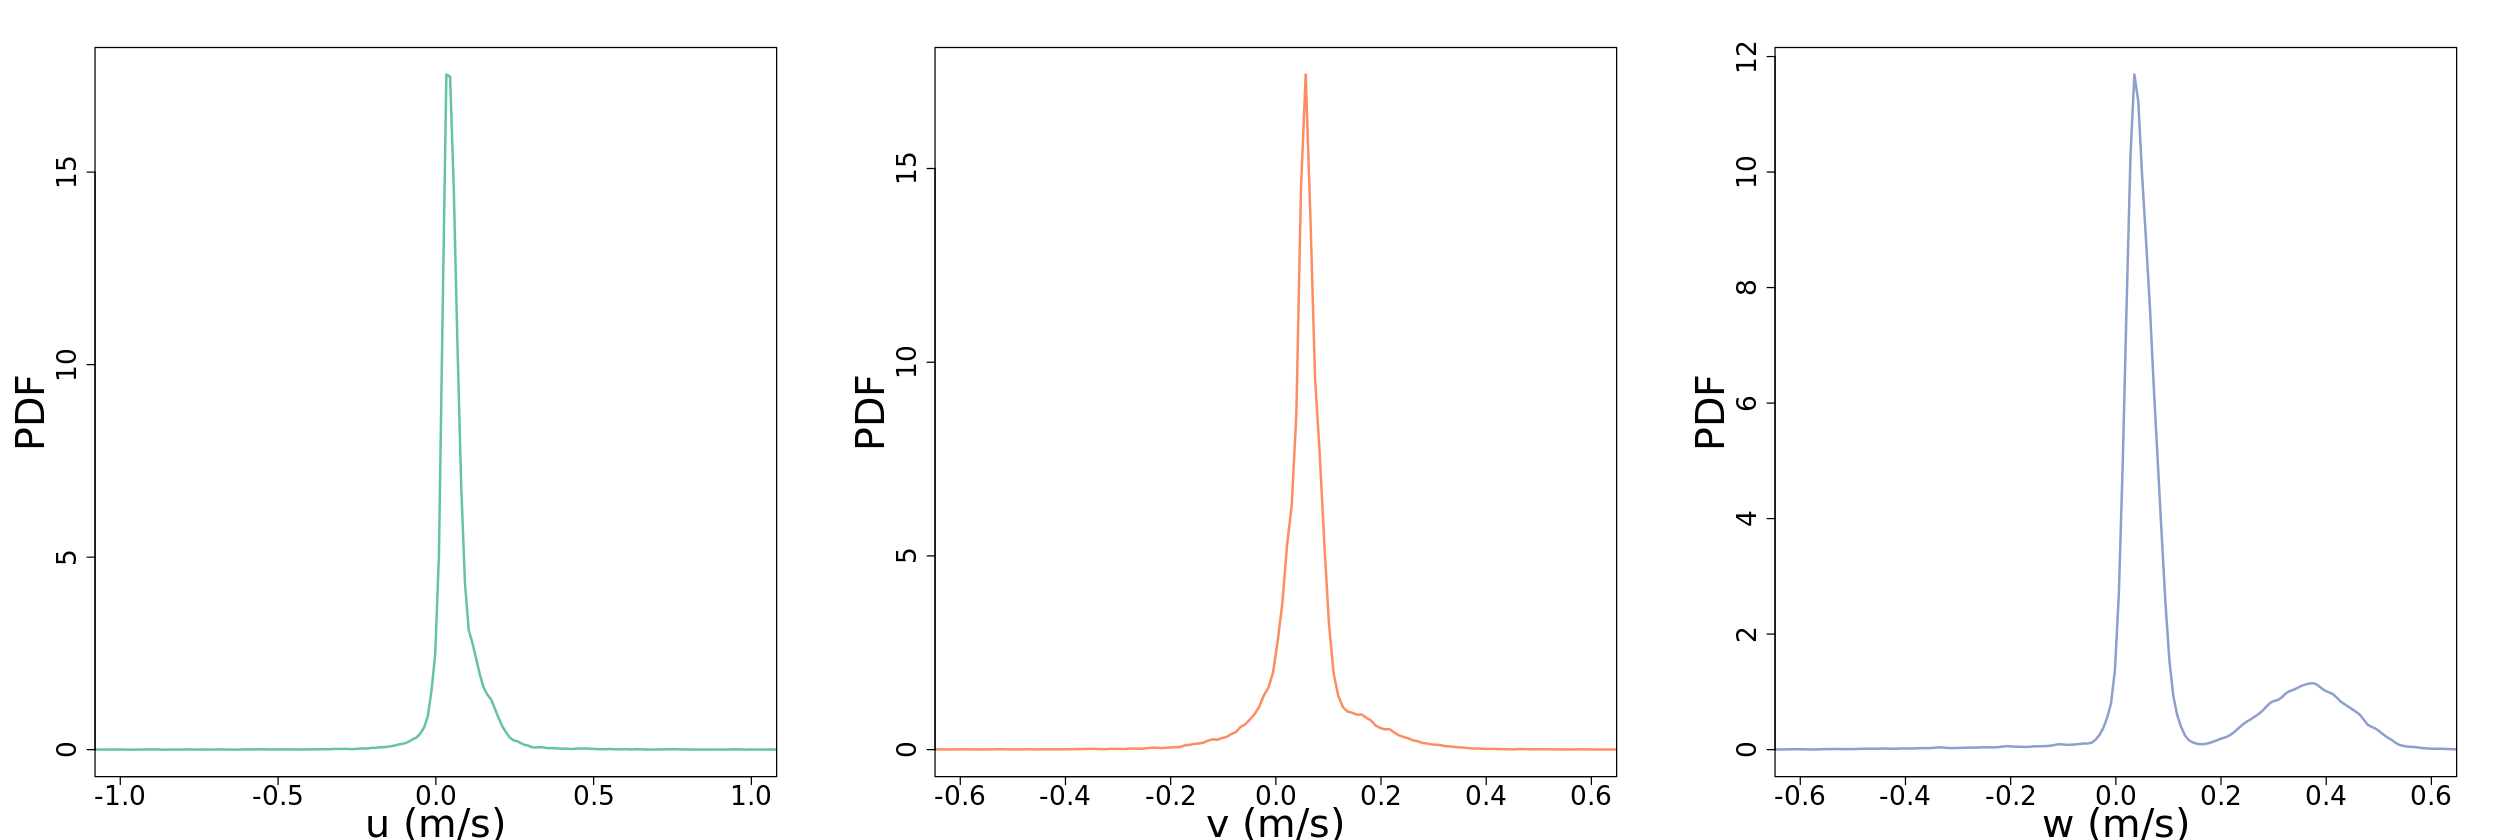

In [ ]:
u = density(data$u)
v = density(data$v)
w = density(data$w)

col_1 = '#66c2a5'
col_2 = '#fc8d62'
col_3 = '#8da0cb'

options(repr.plot.width = 21, repr.plot.height = 7)
#pdf('PDF.pdf', height = 7, width = 21)
par(mfrow = c(1,3), cex.main = 3, cex.lab = 3, cex.axis = 2, mar = c(4,6,3,4))
plot(u$x, u$y, type = 'l', lwd = 2, xlab = 'u (m/s)', ylab = 'PDF' , xlim = c(-1,1),
    col = col_1)
#grid()
plot(v$x, v$y, type = 'l', lwd = 2, xlab = 'v (m/s)', ylab = 'PDF' , xlim = c(-0.6,0.6),
    col = col_2)
#grid()
plot(w$x, w$y, type = 'l', lwd = 2, xlab = 'w (m/s)', ylab = 'PDF' , xlim = c(-0.6,0.6),
    col = col_3)
#grid()
#mtext("Funzioni di distribuzione delle componenti della velocità", cex = 2, side = 3, line = -2, outer = TRUE)

#dev.off()

#options(repr.plot.width = 7, repr.plot.height = 7)
#T = density(data$T.sonica)
#plot(T$x, T$y, type = 'l', lwd = 2, xlab = 'T (°C)', ylab = 'PDF')

In [ ]:
u$x[which.max(u$y)]
v$x[which.max(v$y)]


[1] 0.03337395

[1] 0.05675711

Che famo? Soprattutto le velocità sono delle normali molto ben piccate. Ho provato con la logaritmica ma viene uno schifino + ci sono velocità negative che ovviamente vengono escluse. Carina la binormale in w, il picco a 0.5 è dato dal termo sicuro

COSINA DA FARE: dato che l'anemometro è calibrato male si potrebbe sottrarre da tutte le velocità il minimo che registra (specie di ricalibrazione)

## Integrazione dei dati del termoigrometro e media su 1s

In [ ]:
# Uniformazione dati al secondo
data$TIMESTAMP = substr(data$TIMESTAMP, 1, 19) # tanto i decimi di secondo non servono
data$TIMESTAMP = as.POSIXct(data$TIMESTAMP, format = "%Y-%m-%d %H:%M:%S")
# Fa la media sui 20 dati relativi al secondo di riferimento
data = data %>% group_by(TIMESTAMP) %>% 
        summarise(u = mean(u), v = mean(v), w = mean(w), T.sonica = mean(T.sonica)) %>%
        mutate(u = round(u, digits = 4), v = round(v, digits = 4), w = round(w, digits = 4), T.sonica = round(T.sonica, digits = 2))


# Lettura dati termoigrometro
file_in = 'TOA5_Thermohygrometer_G2.dat'
data_hyg = read.table(file_in, , sep = ',', na.string=NA, as.is=TRUE, header = F, skip = 4,
                    col.names = c("TIMESTAMP","RECORD","T.w", 'RH'))
data_hyg = data_hyg %>% select(c('TIMESTAMP', 'T.w', 'RH'))
data_hyg$TIMESTAMP = as.POSIXct(data_hyg$TIMESTAMP, format = "%Y-%m-%d %H:%M:%S")

# Dataframe finale
data = merge(data, data_hyg, by = 'TIMESTAMP')

In [ ]:
## PERIODI ##

per_1 = which(substr(data$TIMESTAMP, 12,19) == '09:15:00')
per_2 = which(substr(data$TIMESTAMP, 12,19) == '09:19:00')
per_3 = which(substr(data$TIMESTAMP, 12,19) == '09:29:20')
per_4 = which(substr(data$TIMESTAMP, 12,19) == '09:34:00')
per_5 = which(substr(data$TIMESTAMP, 12,19) == '09:41:00')
per_6 = which(substr(data$TIMESTAMP, 12,19) == '09:46:00')
per_7 = which(substr(data$TIMESTAMP, 12,19) == '09:49:00')

periodi = c(per_1, per_2, per_3, per_4, per_5, per_6, per_7)

data = data[1:per_7,]

In [ ]:
red = rgb(255,0,0, max = 255, alpha = 30)
blue = rgb(0,0,255, max = 255, alpha = 30)
green = rgb(0,255,0, max = 255, alpha = 30)
purple = rgb(255,0,255, max = 255, alpha = 30)

inserisci_polygon = function(yrange =  c(-1, -1, 1, 1), ytext = 0.8)
{
polygon(c(data$TIMESTAMP[per_1], data$TIMESTAMP[per_2], data$TIMESTAMP[per_2], data$TIMESTAMP[per_1]), 
        yrange, col = red, density = 100)
text(data$TIMESTAMP[round((per_2+per_1)/2)], ytext, '1', col = 'red', cex = 2)

polygon(c(data$TIMESTAMP[per_2], data$TIMESTAMP[per_3], data$TIMESTAMP[per_3], data$TIMESTAMP[per_2]), 
        yrange, col = blue, density = 100)
text(data$TIMESTAMP[round((per_2+per_3)/2)], ytext, '2 (flusso aria calda)', col = 'blue', cex = 2)

polygon(c(data$TIMESTAMP[per_3], data$TIMESTAMP[per_4], data$TIMESTAMP[per_4], data$TIMESTAMP[per_3]), 
        yrange, col = red, density = 100)
text(data$TIMESTAMP[round((per_3+per_4)/2)], ytext, '3', col = 'red', cex = 2)

polygon(c(data$TIMESTAMP[per_4], data$TIMESTAMP[per_5], data$TIMESTAMP[per_5], data$TIMESTAMP[per_4]), 
        yrange, col = green, density = 100)
text(data$TIMESTAMP[round((per_4+per_5)/2)], ytext, '4 (flusso aria fredda)', col = 'green', cex = 2)

polygon(c(data$TIMESTAMP[per_5], data$TIMESTAMP[per_6], data$TIMESTAMP[per_6], data$TIMESTAMP[per_5]), 
        yrange, col = red, density = 100)
text(data$TIMESTAMP[round((per_5+per_6)/2)], ytext, '5', col = 'red', cex = 2)

polygon(c(data$TIMESTAMP[per_6], data$TIMESTAMP[per_7], data$TIMESTAMP[per_7], data$TIMESTAMP[per_6]), 
        yrange, col = purple, density = 100)
text(data$TIMESTAMP[round((per_6+per_7)/2)], ytext, '6', col = 'purple', cex = 2)

axis(1, data$TIMESTAMP[periodi],
     format(data$TIMESTAMP[periodi], "%H:%M"))
}

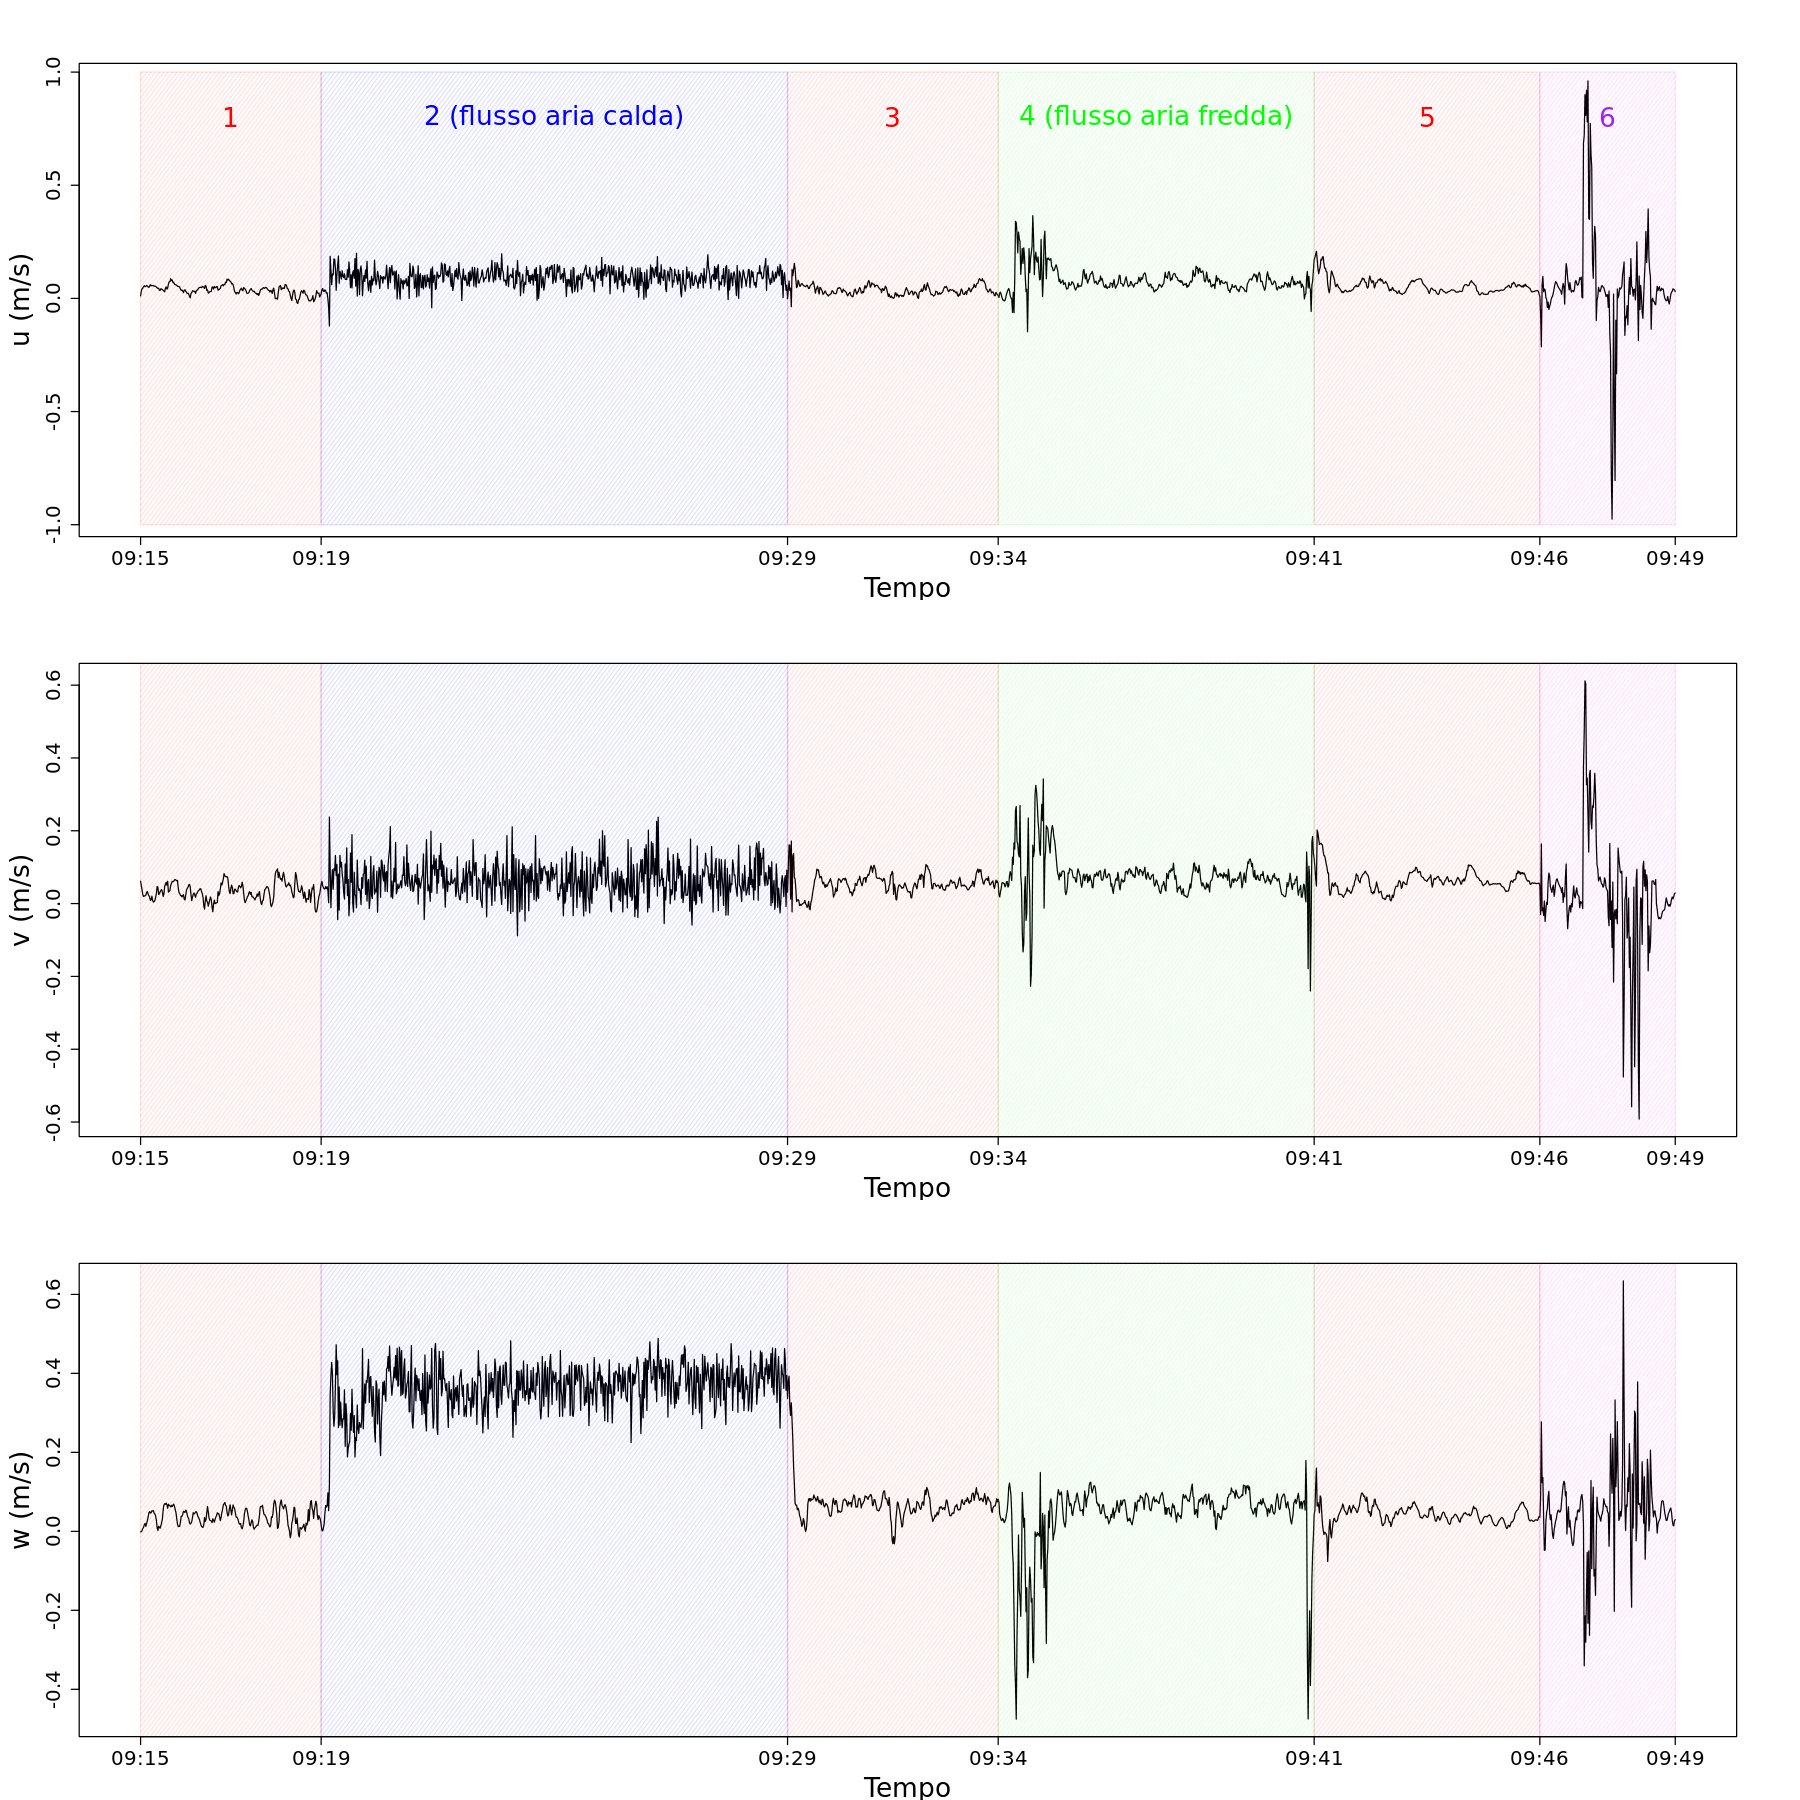

In [ ]:
#pdf('serie_temporali_prova.pdf', width = 15, height = 15)
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(3,1), cex.axis = 1.5, cex.lab = 2, mar = c(4,5,4,4))
##
plot(data$TIMESTAMP, data$u, type = 'l', , xlab = 'Tempo', ylab = 'u (m/s)',
    xaxt = 'n')
inserisci_polygon()

##
plot(data$TIMESTAMP, data$v, type = 'l', xlab = 'Tempo', ylab = 'v (m/s)',
    xaxt = 'n')
inserisci_polygon()
##
plot(data$TIMESTAMP, data$w, type = 'l', xlab = 'Tempo', ylab = 'w (m/s)',
    xaxt = 'n')
inserisci_polygon()

#dev.off()

Carinoooooo si vede bene il termo! E anche quando hai sbattuto il librino

## Media temporale

Poi ci sono da aggiungere i periodi colorati come nella scorsa esperienza (non ho le ore prese giù)

In [ ]:
per_1 = which(substr(data$TIMESTAMP, 12,19) == '09:15:00')
per_2 = which(substr(data$TIMESTAMP, 12,19) == '09:19:00')
per_3 = which(substr(data$TIMESTAMP, 12,19) == '09:29:00')
per_4 = which(substr(data$TIMESTAMP, 12,19) == '09:34:00')
per_5 = which(substr(data$TIMESTAMP, 12,19) == '09:41:00')
per_6 = which(substr(data$TIMESTAMP, 12,19) == '09:46:00')
per_7 = which(substr(data$TIMESTAMP, 12,19) == '09:49:00')
periodi = c(per_1, per_2, per_3, per_4, per_5, per_6, per_7)

In [ ]:
# periodo da dare in secondi
mediatore = function(periodo, vett, titolo='u', plot=TRUE, yrange=c(-1,-1,1,1),
                        ytext = 0.5) {

    u = c()

    N = length(vett)/periodo
    periodi = (periodi-1)/periodo
    for (i in 0:(N-1)) {
        media = mean(vett[(i*periodo+1):((i+1)*periodo)])
        u = c(u, media)
        }
    if (plot == TRUE){
    plot(u, type = 'l', ylab = titolo, xlab = 'Tempo', xaxt = 'n', lwd = 2)
    
    polygon(c(periodi[1], periodi[2], periodi[2], periodi[1]),
            yrange, col = red, density = 100)
    text((periodi[1]+periodi[2])/2, ytext, '1', col = 'red', cex = 2)

    polygon(c(periodi[2], periodi[3], periodi[3], periodi[2]),
            yrange, col = blue, density = 100)
    text((periodi[2]+periodi[3])/2, ytext, '2', col = 'blue', cex = 2)


    polygon(c(periodi[3], periodi[4], periodi[4], periodi[3]),
            yrange, col = red, density = 100)
    text((periodi[3]+periodi[4])/2, ytext, '3', col = 'red', cex = 2)


    polygon(c(periodi[4], periodi[5], periodi[5], periodi[4]),
            yrange, col = green, density = 100)
    text((periodi[4]+periodi[5])/2, ytext, '4', col = 'green', cex = 2)

    polygon(c(periodi[5], periodi[6], periodi[6], periodi[5]),
            yrange, col = red, density = 100)
    text((periodi[5]+periodi[6])/2, ytext, '5', col = 'red', cex = 2)


    polygon(c(periodi[6], periodi[7], periodi[7], periodi[6]),
            yrange, col = purple, density = 100)
    text((periodi[6]+periodi[7])/2 - 1, ytext, '6', col = 'purple', cex = 2)


    axis(1, periodi, format(data$TIMESTAMP[periodi*periodo + 1], '%H:%M'))
    
    }    
    return(u)
}


# seleziona periodo in secondi per media temporale
dt = 20
options(repr.plot.width = 28, repr.plot.height = 14)
pdf('serie_temporale.pdf', width = 28, height = 14)
par(mfrow = c(2,2), cex.lab = 2.7, mar = c(5,5,5,4), cex.axis = 1.7, cex = 0.8)
u = mediatore(dt, data$u, 'u (m/s)', ytext = -0.1)
v = mediatore(dt, data$v, 'v (m/s)', ytext = -0.11)
w = mediatore(dt, data$w, 'w (m/s)', ytext = -0.12)
T = mediatore(dt, data$T.sonica, 'T (°C)', yrange=c(15,15,30,30), ytext= 17.5)
dev.off()

png 
  2

In [ ]:
varianze = list(dt=c(),N=c(),u=c(),v=c(),w=c())
cat('### VARIANZE ### \n')
cat('dt\t N \t u \t\t v \t\t w \n')
for (dt in c(1,10,15,20,30,45,60,120)) {
    u1 = mediatore(dt,data$u,plot=F)
    v1 = mediatore(dt,data$v,plot=F)
    w1 = mediatore(dt,data$w,plot=F)

cat(dt, '\t', length(u1), '\t', var(u1), '\t', var(v1), '\t', var(w1), '\n')
varianze$dt = c(varianze$dt, dt)  
varianze$N = c(varianze$N, length(u1)) 
varianze$u = c(varianze$u, var(u1))   
varianze$v = c(varianze$v, var(v1))    
varianze$w = c(varianze$w, var(w1))    
}

### VARIANZE ### 
dt	 N 	 u 		 v 		 w 
1 	 2041 	 0.006822243 	 0.00420054 	 0.02545969 
10 	 204 	 0.004253809 	 0.00202597 	 0.02347785 
15 	 136 	 0.003810455 	 0.002024708 	 0.02294865 
20 	 102 	 0.002827723 	 0.001584279 	 0.02272143 
30 	 68 	 0.002221515 	 0.001263899 	 0.02246323 
45 	 45 	 0.002049594 	 0.000860919 	 0.0220289 
60 	 34 	 0.0006281162 	 0.0006765184 	 0.02173681 
120 	 17 	 0.0004941686 	 0.0003086494 	 0.02153004 


In [ ]:
dt = c(1,10,15,20,30,45,60,120)
cat('dt \t u \t\t v \t\t w \t\t \n')
for (i in 1:length(varianze$u)) {
    cat(dt[i], '\t', varianze$u[i]/mean(data$u[per_4:per_5])**2*100, '\t',
                    varianze$v[i]/mean(data$v[per_4:per_5])**2*100, '\t',
                    varianze$w[i]/mean(data$w[per_4:per_5])**2*100, '\n')}


dt 	 u 		 v 		 w 		 
1 	 104.4726 	 73.54599 	 1657.967 
10 	 65.1408 	 35.47211 	 1528.906 
15 	 58.35149 	 35.45001 	 1494.444 
20 	 43.30241 	 27.73867 	 1479.647 
30 	 34.01923 	 22.12923 	 1462.833 
45 	 31.3865 	 15.07357 	 1434.549 
60 	 9.618672 	 11.84496 	 1415.528 
120 	 7.567463 	 5.40405 	 1402.063 


In [ ]:
dt = c(1,10,15,20,30,45,60,120)
cat('dt \t u \t\t v \t\t w \t\t \n')
for (i in 1:length(varianze$u)) {
    cat(dt[i], '\t', varianze$u[i]/mean(data$u)**2*100, '\t',
                    varianze$v[i]/mean(data$v)**2*100, '\t',
                    varianze$w[i]/mean(data$w)**2*100, '\n')}


dt 	 u 		 v 		 w 		 
1 	 152.0794 	 125.4082 	 125.6903 
10 	 94.82464 	 60.48585 	 115.9062 
15 	 84.94153 	 60.44817 	 113.2936 
20 	 63.03477 	 47.29905 	 112.1719 
30 	 49.52136 	 37.73403 	 110.8972 
45 	 45.68893 	 25.70295 	 108.753 
60 	 14.00178 	 20.19763 	 107.311 
120 	 11.01586 	 9.214806 	 106.2902 


In [ ]:
varianze$dt

[1]   1  10  15  20  30  45  60 120

In [ ]:
options(repr.plot.width=14, repr.plot.height = 7)
pdf('varianze_uv.pdf', width = 7, height = 7)
par(cex.axis = 1.15, cex.main = 2, cex.lab = 1.5)
plot(varianze$dt, varianze$u, type = 'o', col = col_1, ylab = 'Varianza',
    xlab = 'dt (s)', lwd = 2, xaxt = 'n',
    panel.first = {
            panel.first = {
    axis(2, tck = 1, lty=2, col='gray')
    axis(1, at = c(1, 15, 30, 60, 120), tck = 1, col = 'gray', labels = NA, lty = 2)
    axis(1, at = c(1, 15, 30, 60, 120))
    axis(3, at = c(1, 15, 30, 60, 120), labels = varianze$N[c(1, 3, 5, 7, 8)])}
    })
mtext("Numero di dati", line=2.5, side=3, cex = 1.4)

lines(varianze$dt, varianze$v, col = col_2, lwd = 2, type = 'o')
legend('topright', col = c(col_1, col_2), legend = c('u', 'v'), lty = 1, lwd = 2)
dev.off()

pdf('varianze_w.pdf', width = 7, height = 7)
par(cex.axis = 1.15, cex.main = 2, cex.lab = 1.5)
plot(varianze$dt, varianze$w, type = 'o', ylab = 'Varianza',
    xlab = 'dt (s)', lwd = 2, col = col_3, xaxt = 'n', 
    panel.first = {
    axis(2, tck = 1, lty=2, col='gray')
    axis(1, at = c(1, 15, 30, 60, 120), tck = 1, col = 'gray', labels = NA, lty = 2)
    axis(1, at = c(1, 15, 30, 60, 120))
    axis(3, at = c(1, 15, 30, 60, 120), labels = varianze$N[c(1, 3, 5, 7, 8)])})
mtext("Numero di dati", line=2.5, side=3, cex = 1.4)

dev.off()


png 
  2

png 
  2

In [ ]:
seq(5e-04, 0.003, length.out = length(varianze$N))
length(varianze$N)

[1] 0.0005000000 0.0008571429 0.0012142857 0.0015714286 0.0019285714
[6] 0.0022857143 0.0026428571 0.0030000000

[1] 8

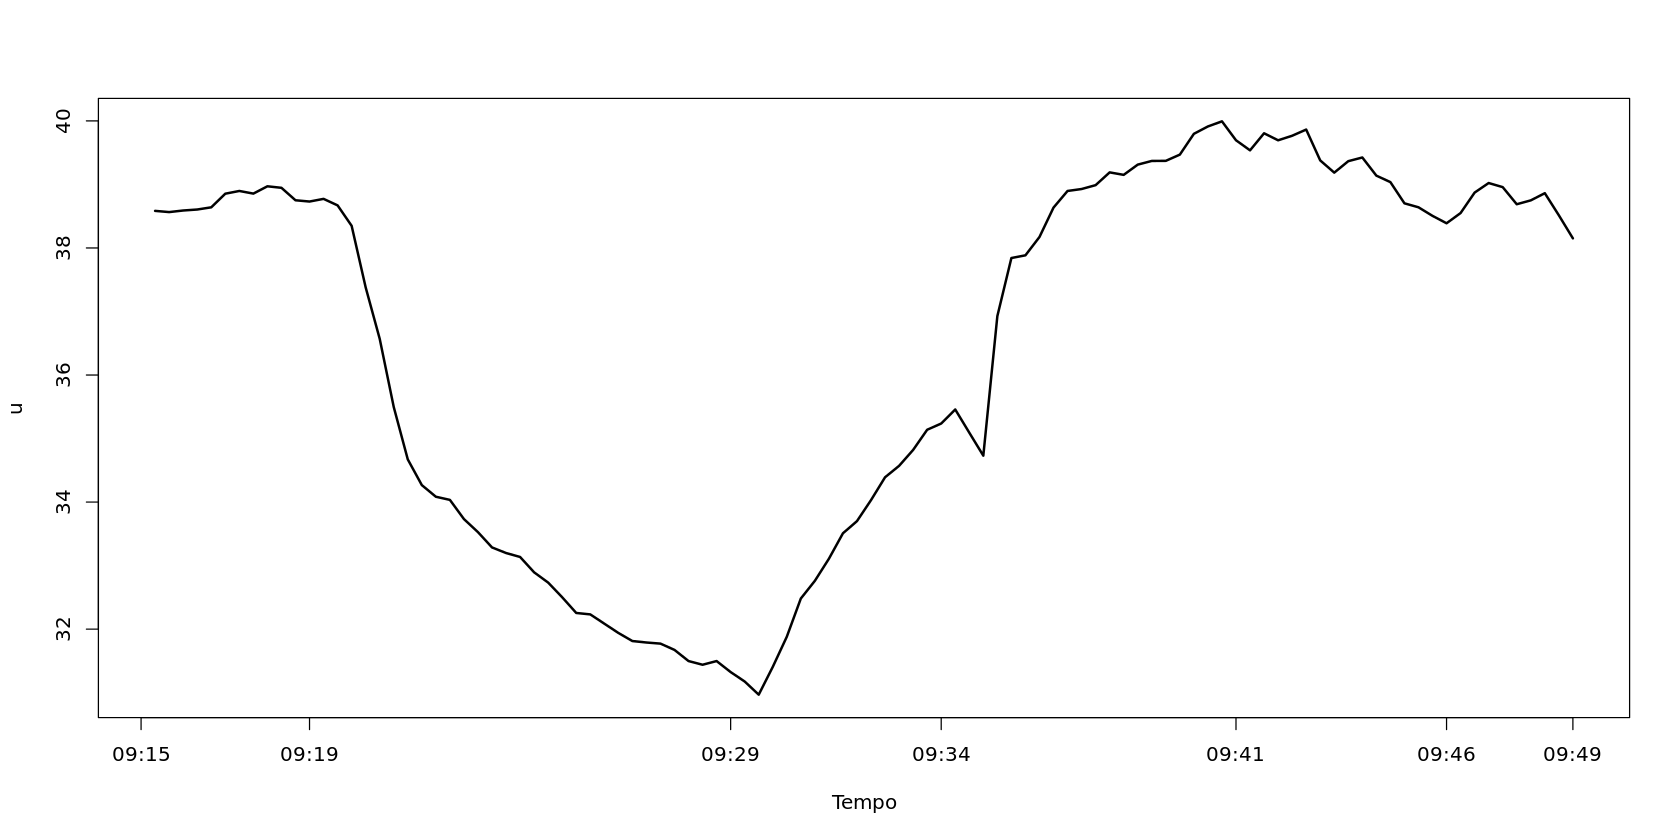

In [ ]:
rh = mediatore(periodo = 20, vett = data$RH)


## PDF a varie integrazioni

png 
  2

png 
  2

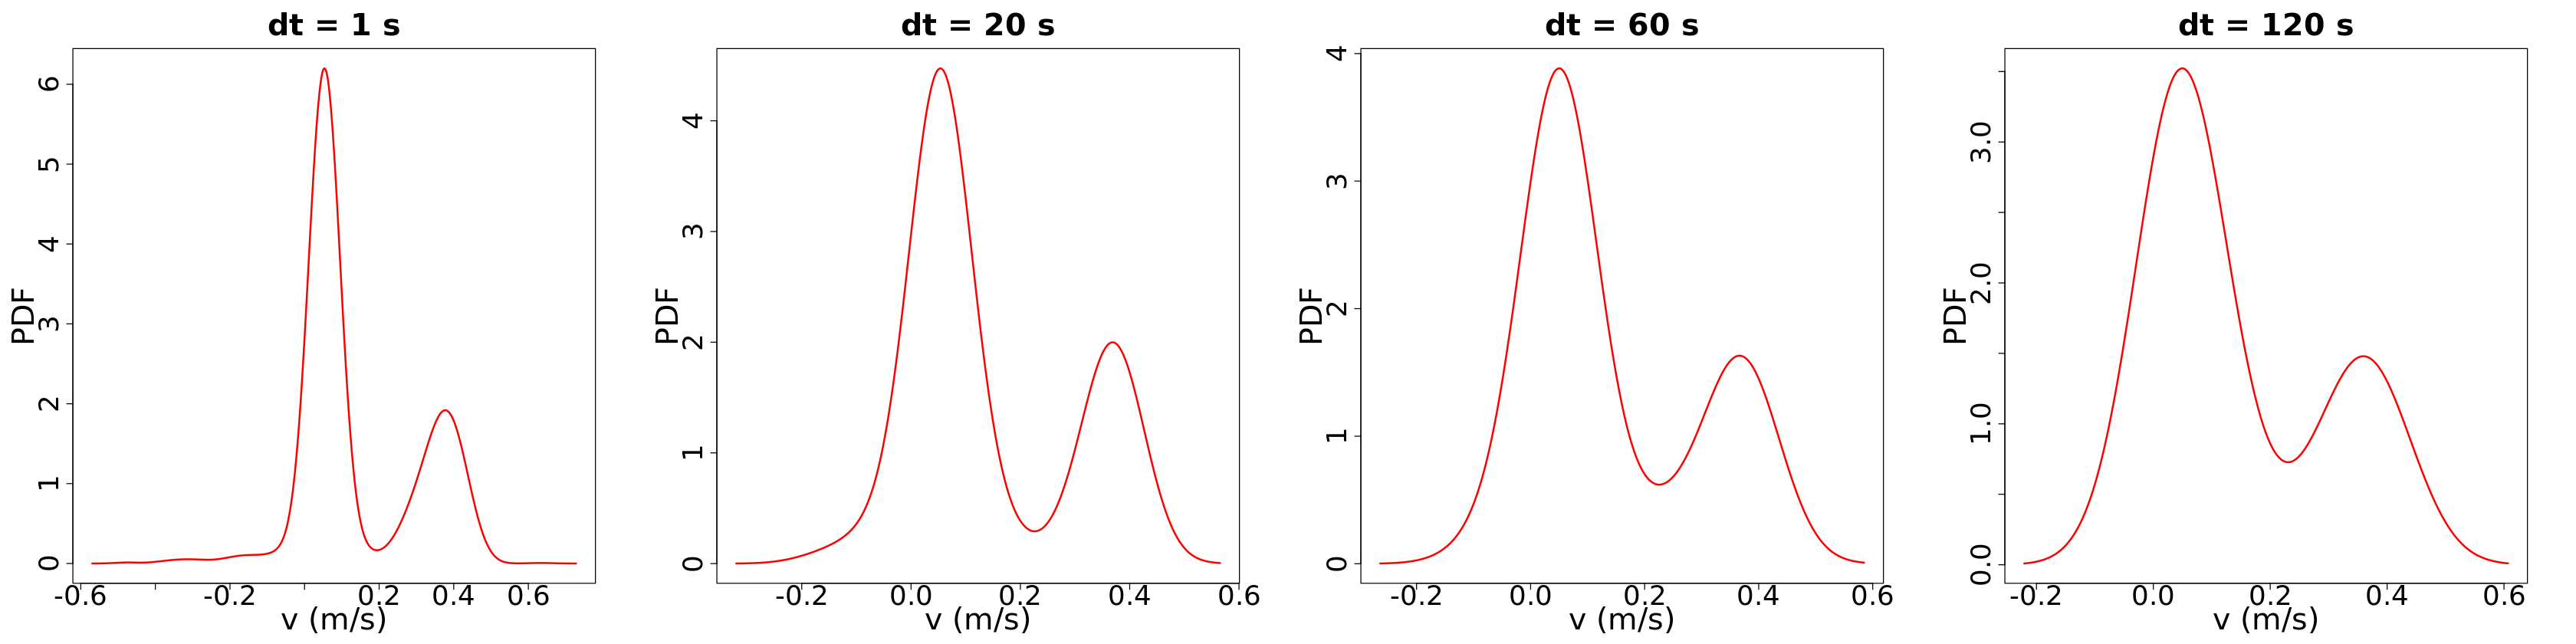

In [ ]:
dt = c(1,20,60,120)
options(repr.plot.width = 28, repr.plot.height = 7)

pdf('PDF_u.pdf', width = 28, height = 7)
par(mfrow = c(1,4), cex.axis = 2.7, cex.lab = 3, cex.main = 3, mar = c(5,6,4,4))
for (i in 1:length(dt)){
    u = mediatore(dt[i], data$u, plot = F)
    u = density(u)
    plot(u$x, u$y, type = 'l', lwd = 2, col = col_1,
    main = paste('dt =', dt[i], 's'), ylab = 'PDF', xlab = 'u (m/s)')
}
dev.off()

pdf('PDF_v.pdf', width = 28, height = 7)
par(mfrow = c(1,4), cex.axis = 2.7, cex.lab = 3, cex.main = 3, mar = c(5,6,4,4))
for (i in 1:length(dt)){
    v = mediatore(dt[i], data$v, plot = F)
    v = density(v)
    plot(v$x, v$y, type = 'l', lwd = 2, col = col_2,
    main = paste('dt =', dt[i], 's'), ylab = 'PDF', xlab = 'v (m/s)')
}
dev.off()

par(mfrow = c(1,4), cex.axis = 2.7, cex.lab = 3, cex.main = 3, mar = c(5,6,4,4))
for (i in 1:length(dt)){
    v = mediatore(dt[i], data$w, plot = F)
    v = density(v)
    plot(v$x, v$y, type = 'l', lwd = 2, col = 'red',
    main = paste('dt =', dt[i], 's'), ylab = 'PDF', xlab = 'v (m/s)')
}

## Correlazione tra forzanti

### w vs T

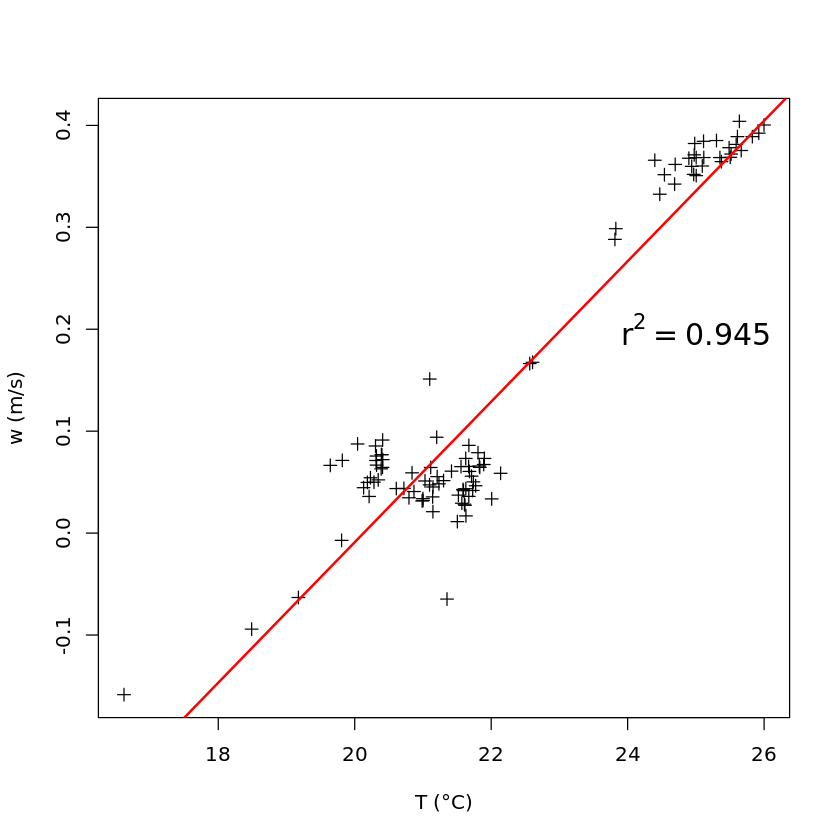

In [ ]:
# Scatterplot
#pdf("Correlazione_w_t_prova.pdf", height = 7, width = 7)
options(repr.plot.width = 7, repr.plot.height = 7)
plot(T, w, pch = 3, xlab = 'T (°C)', ylab = 'w (m/s)')
reg = lm(w ~ T)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(0.0,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(T,w), digits = 3)
text(25, 0.2, bquote(r^2 == .(R)), cex = 1.5)

#dev.off()

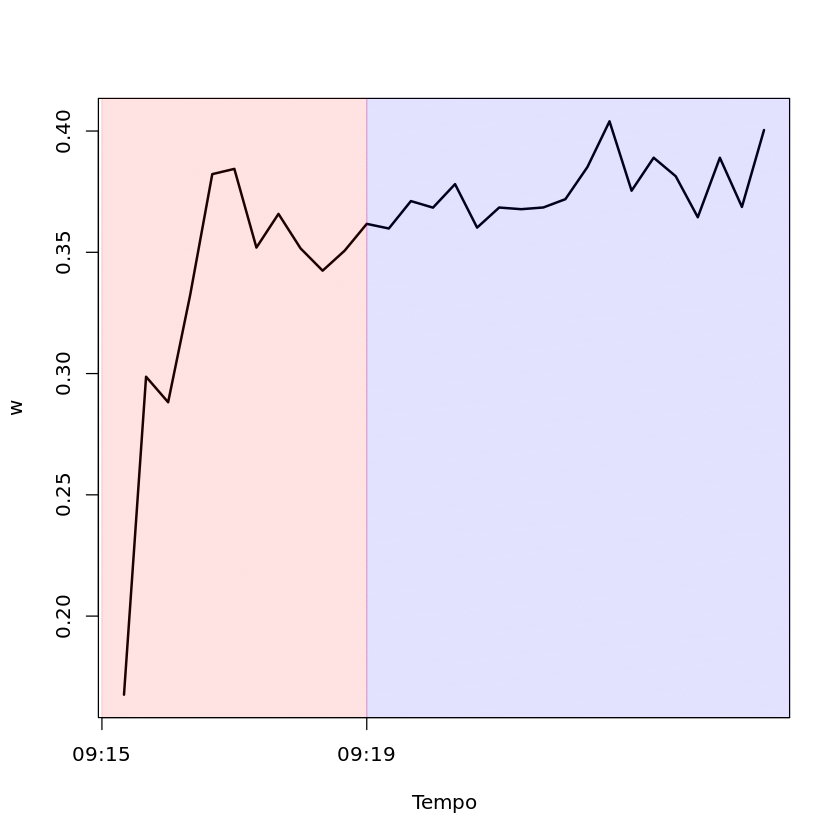

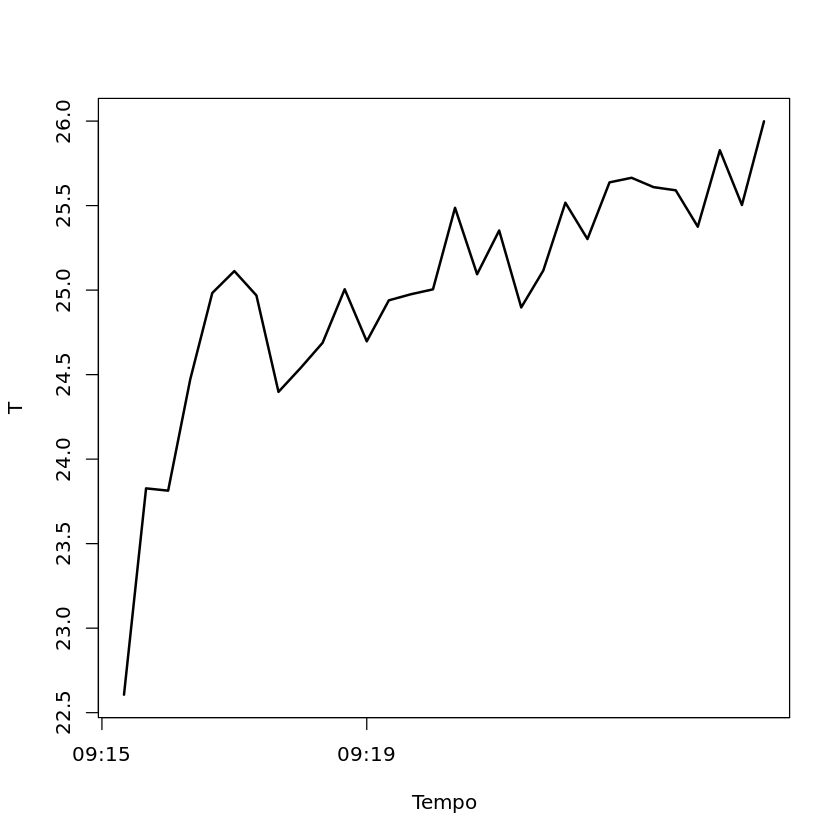

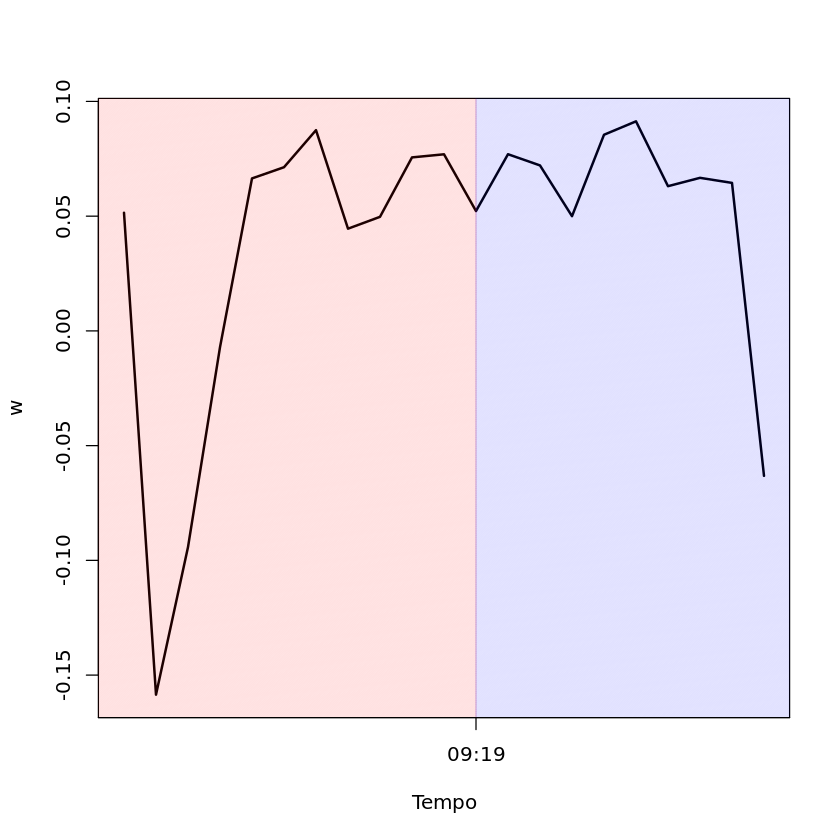

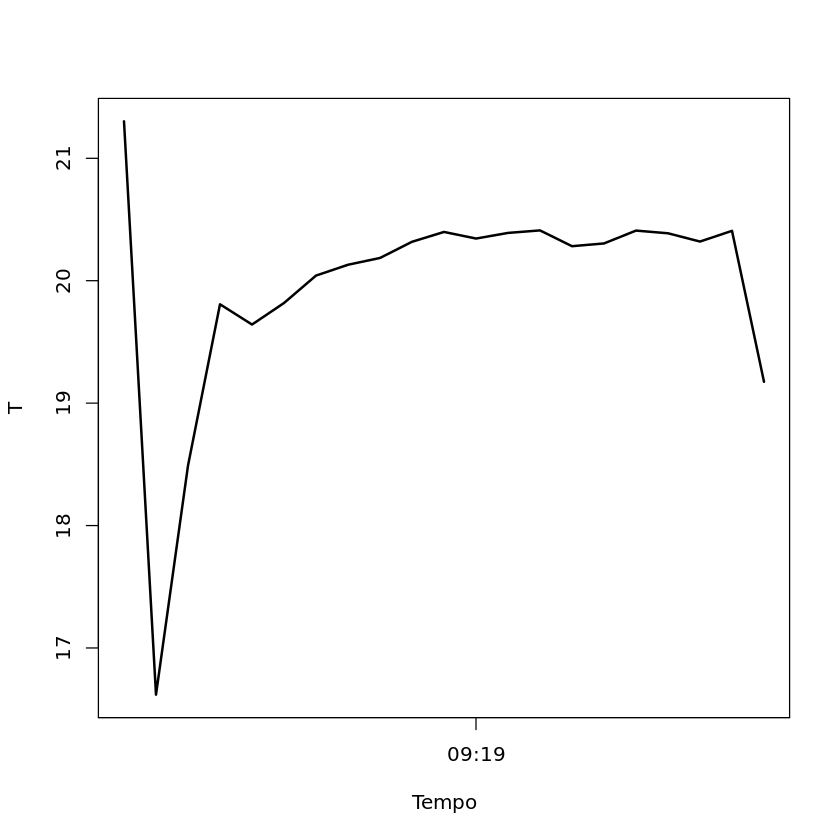

In [ ]:
dt = 20
w_t = mediatore(dt, data$w[per_2:per_3], 'w')
t_t = mediatore(dt, data$T.sonica[per_2:per_3], 'T')

w_f = mediatore(dt, data$w[per_4:per_5], 'w')
t_f = mediatore(dt, data$T.sonica[per_4:per_5], 'T')

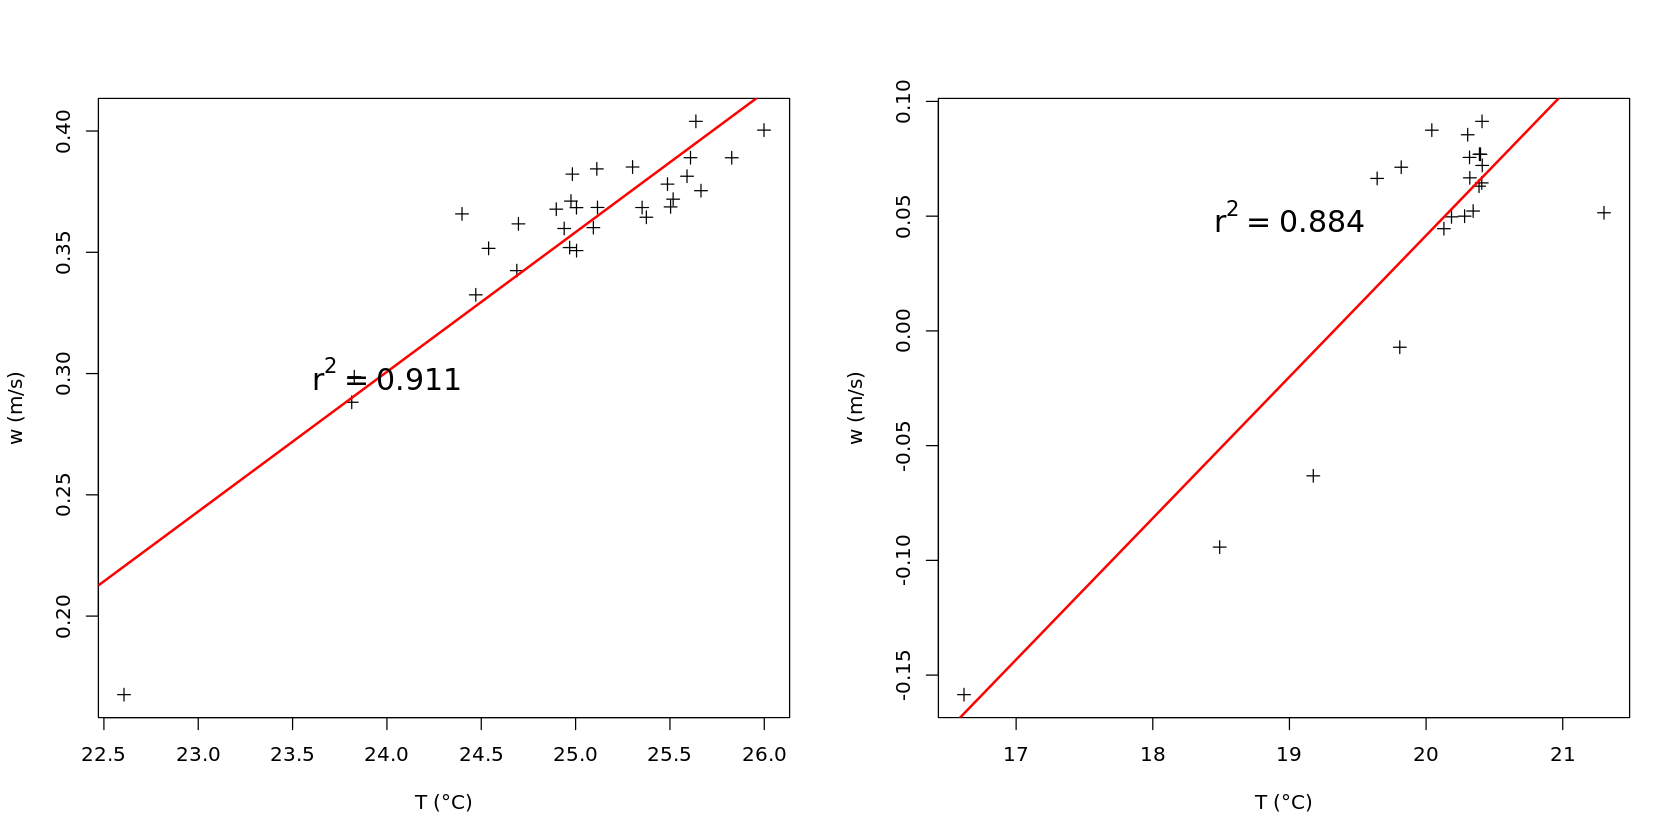

In [ ]:
# Scatterplot

options(repr.plot.width = 14, repr.plot.height = 7)
par(mfrow = c(1,2))
plot(t_t, w_t, pch = 3, xlab = 'T (°C)', ylab = 'w (m/s)')
reg = lm(w_t ~ t_t)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(0.0,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(t_t,w_t), digits = 3)
text(24, 0.3, bquote(r^2 == .(R)), cex = 1.5)

plot(t_f, w_f, pch = 3, xlab = 'T (°C)', ylab = 'w (m/s)')
reg = lm(w_f ~ t_f)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(0.0,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(t_f,w_f), digits = 3)
text(19, 0.05 , bquote(r^2 == .(R)), cex = 1.5)

### u, v vs T

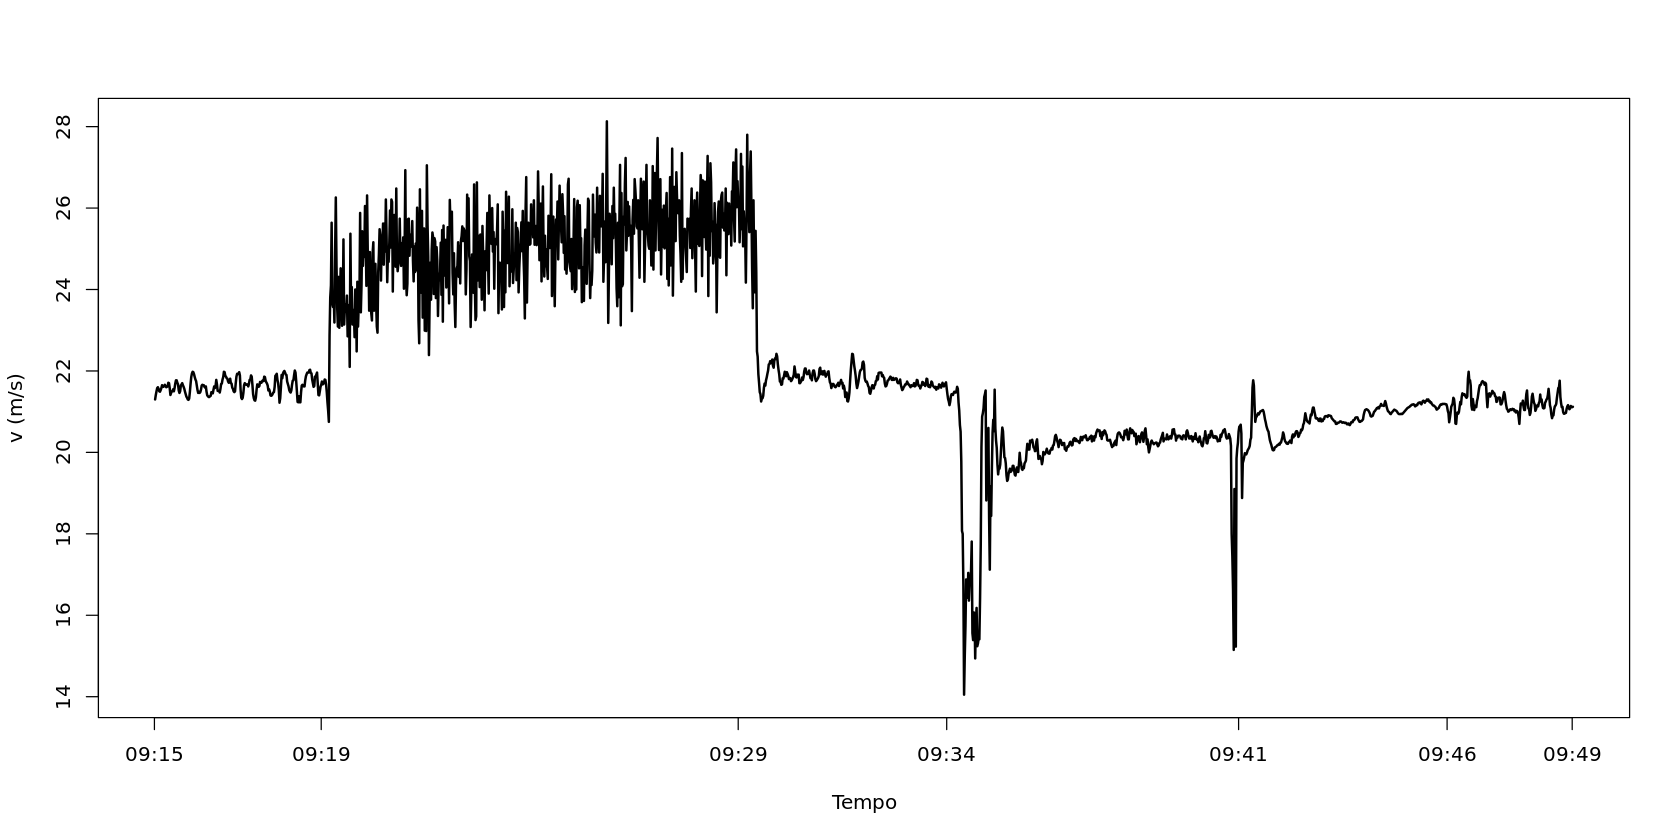

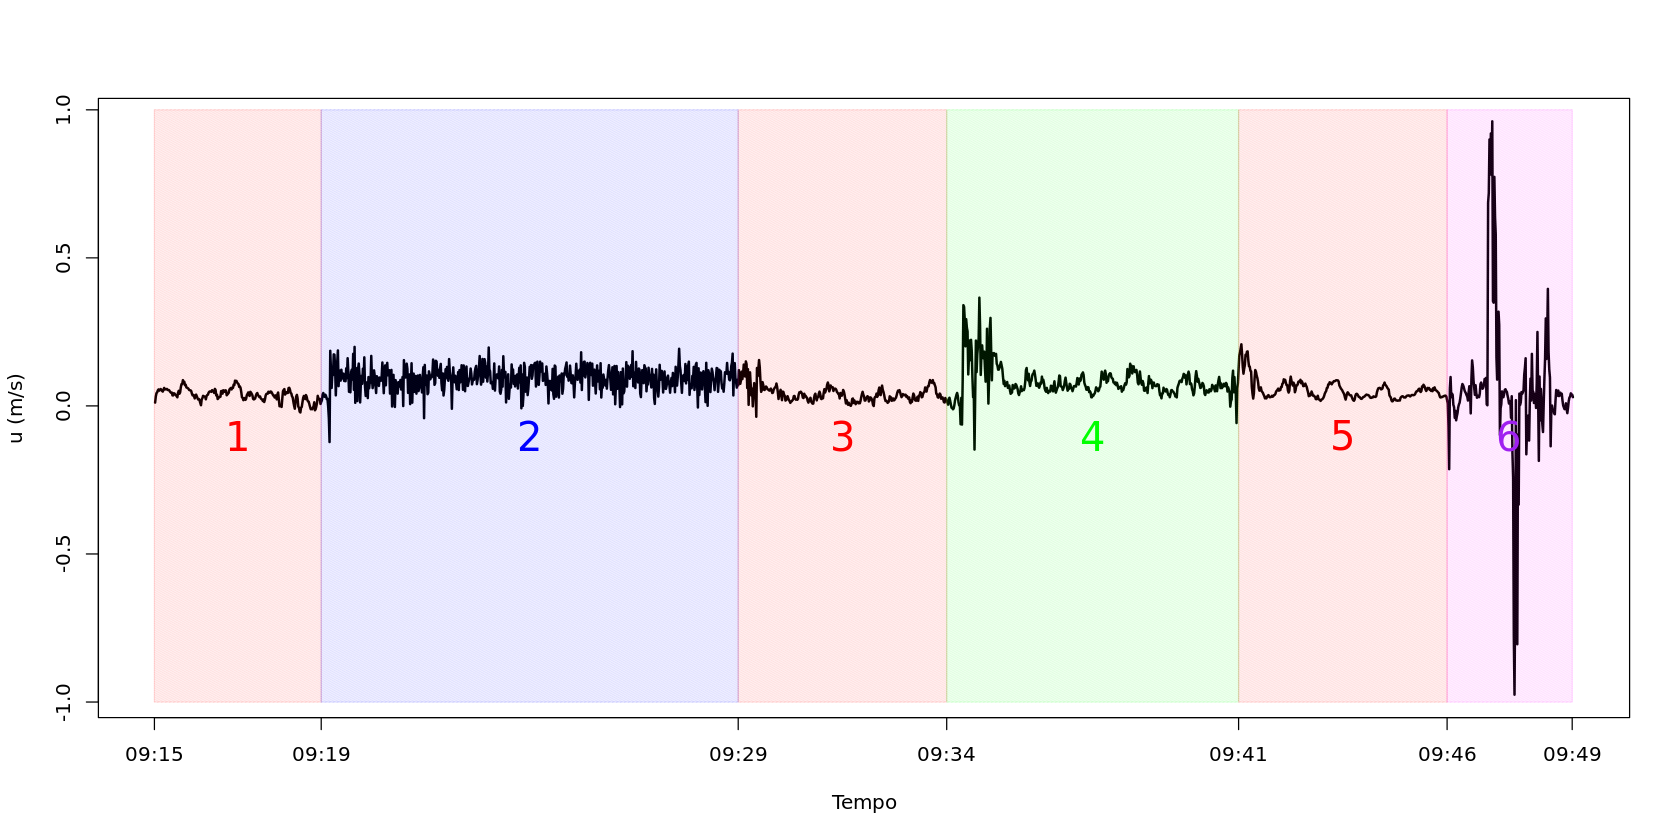

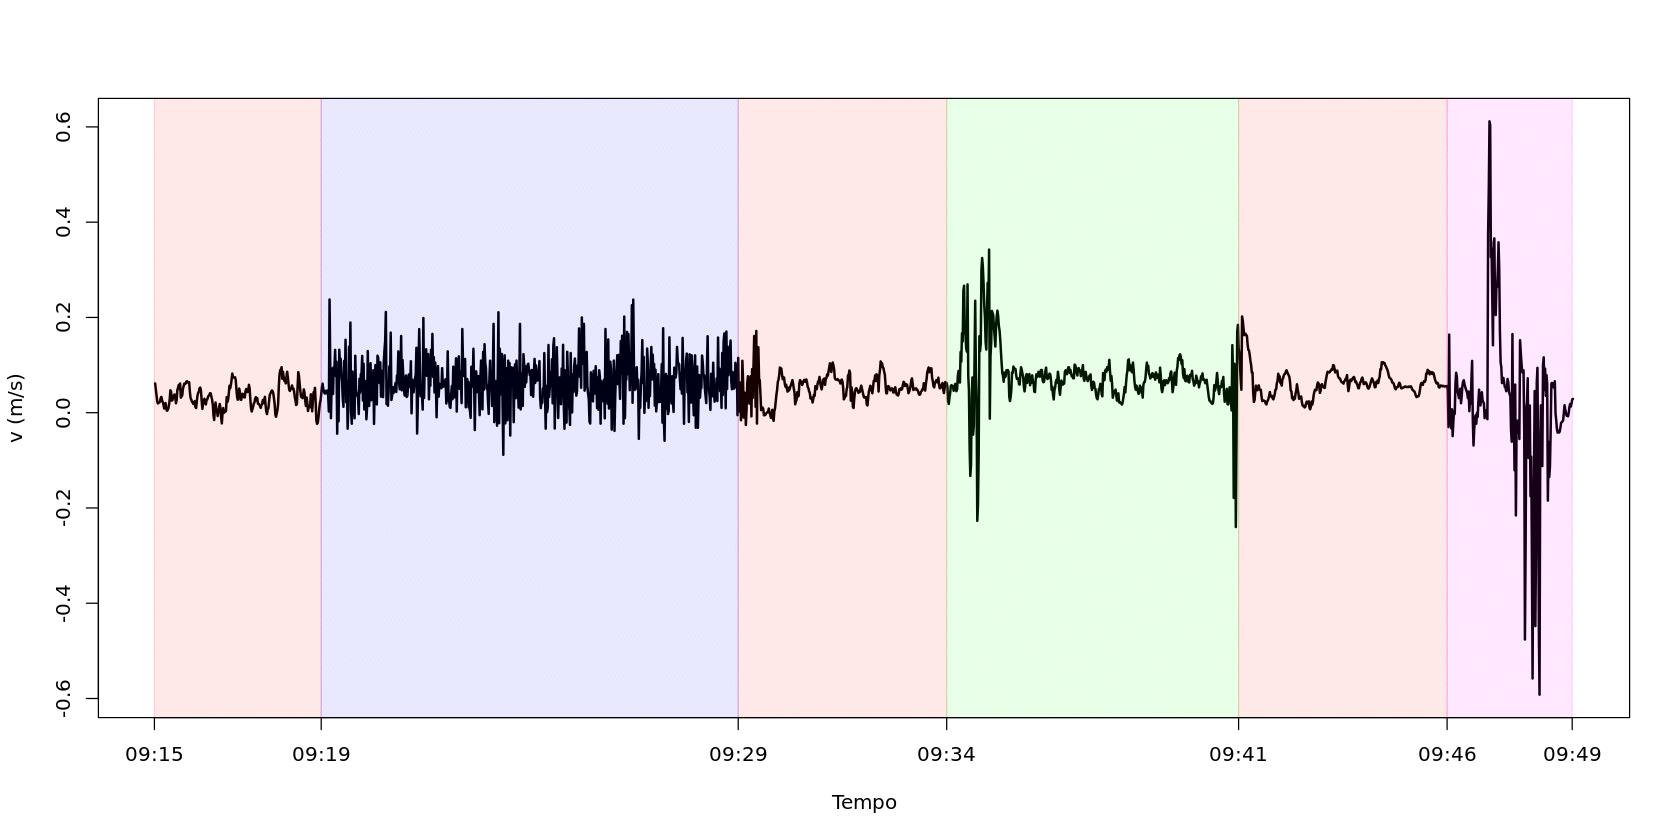

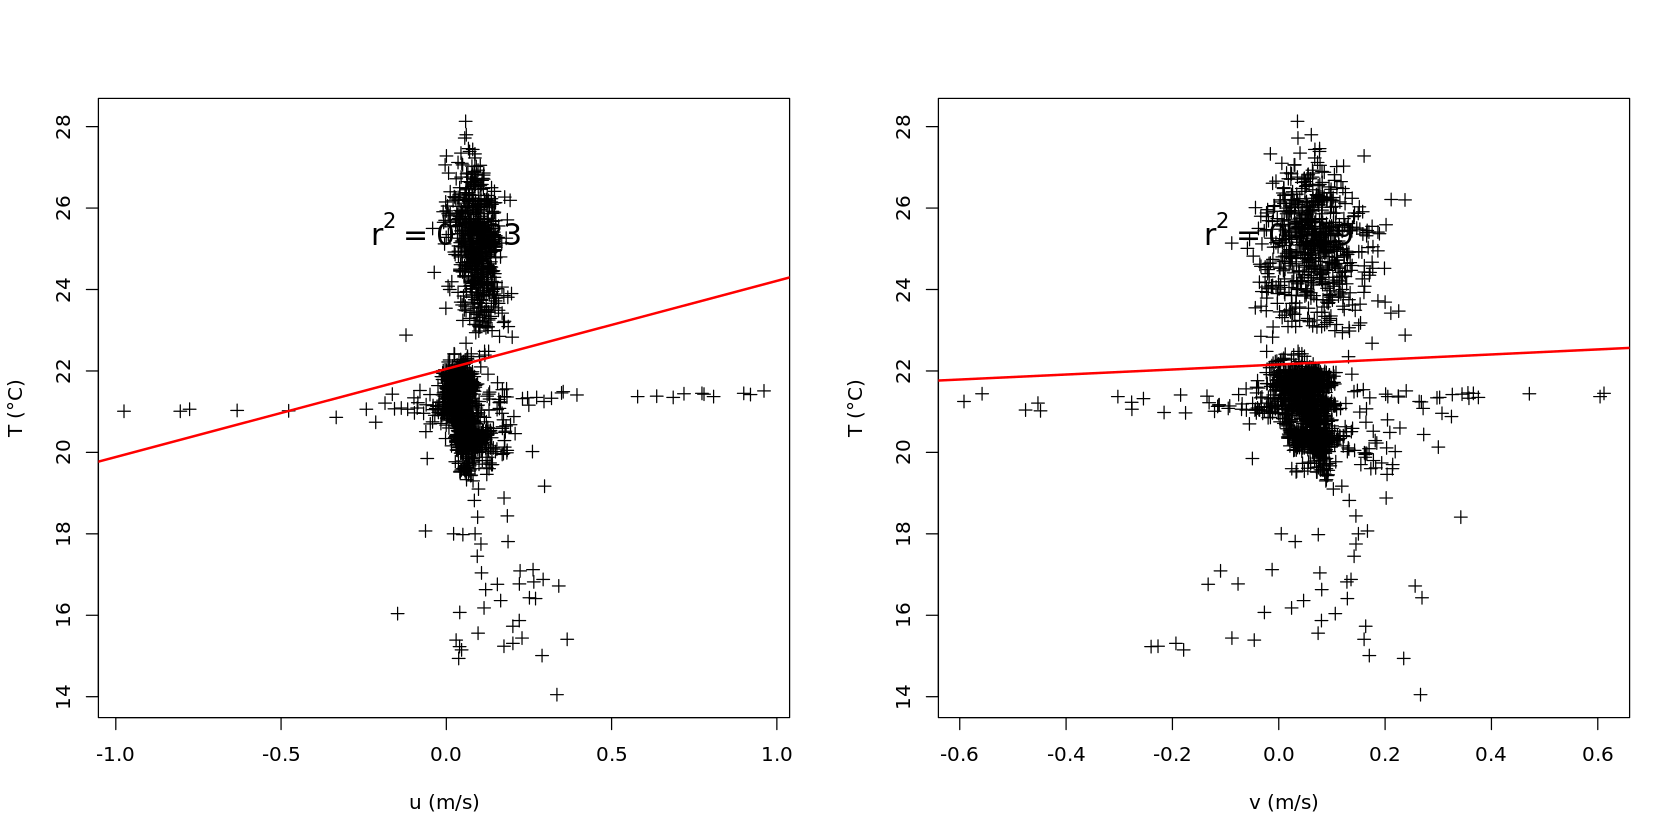

In [ ]:
# Scatterplot

dt= 1
T = mediatore(dt, data$T.sonica, 'v (m/s)', ytext = 7)
u = mediatore(dt, data$u, 'u (m/s)', ytext = -0.1)
v = mediatore(dt, data$v, 'v (m/s)', ytext = 7)

options(repr.plot.width = 14, repr.plot.height = 7)
par(mfrow = c(1,2))
plot(u, T, pch = 3, xlab = 'u (m/s)', ylab = 'T (°C)')
reg = lm(T ~ u)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(-0.05,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(T,u), digits = 3)
text(0, 25.5, bquote(r^2 == .(R)), cex = 1.5)

# Scatterplot
plot(v, T, pch = 3, xlab = 'v (m/s)', ylab = 'T (°C)')
reg = lm(T ~ v)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(-0.05,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(T,v), digits = 3)
text(0, 25.5, bquote(r^2 == .(R)), cex = 1.5)



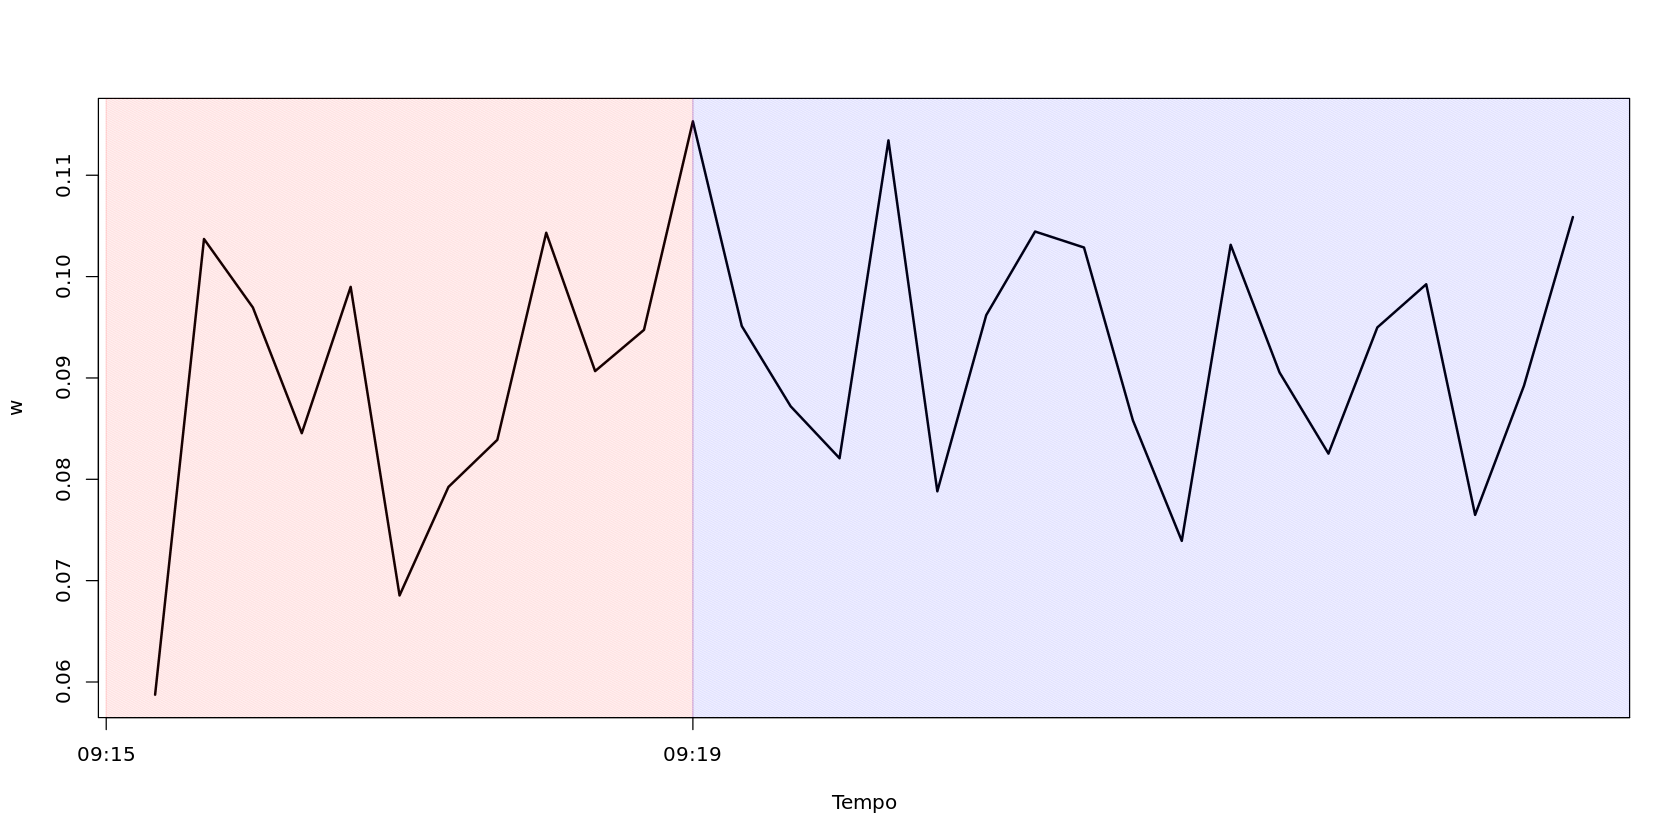

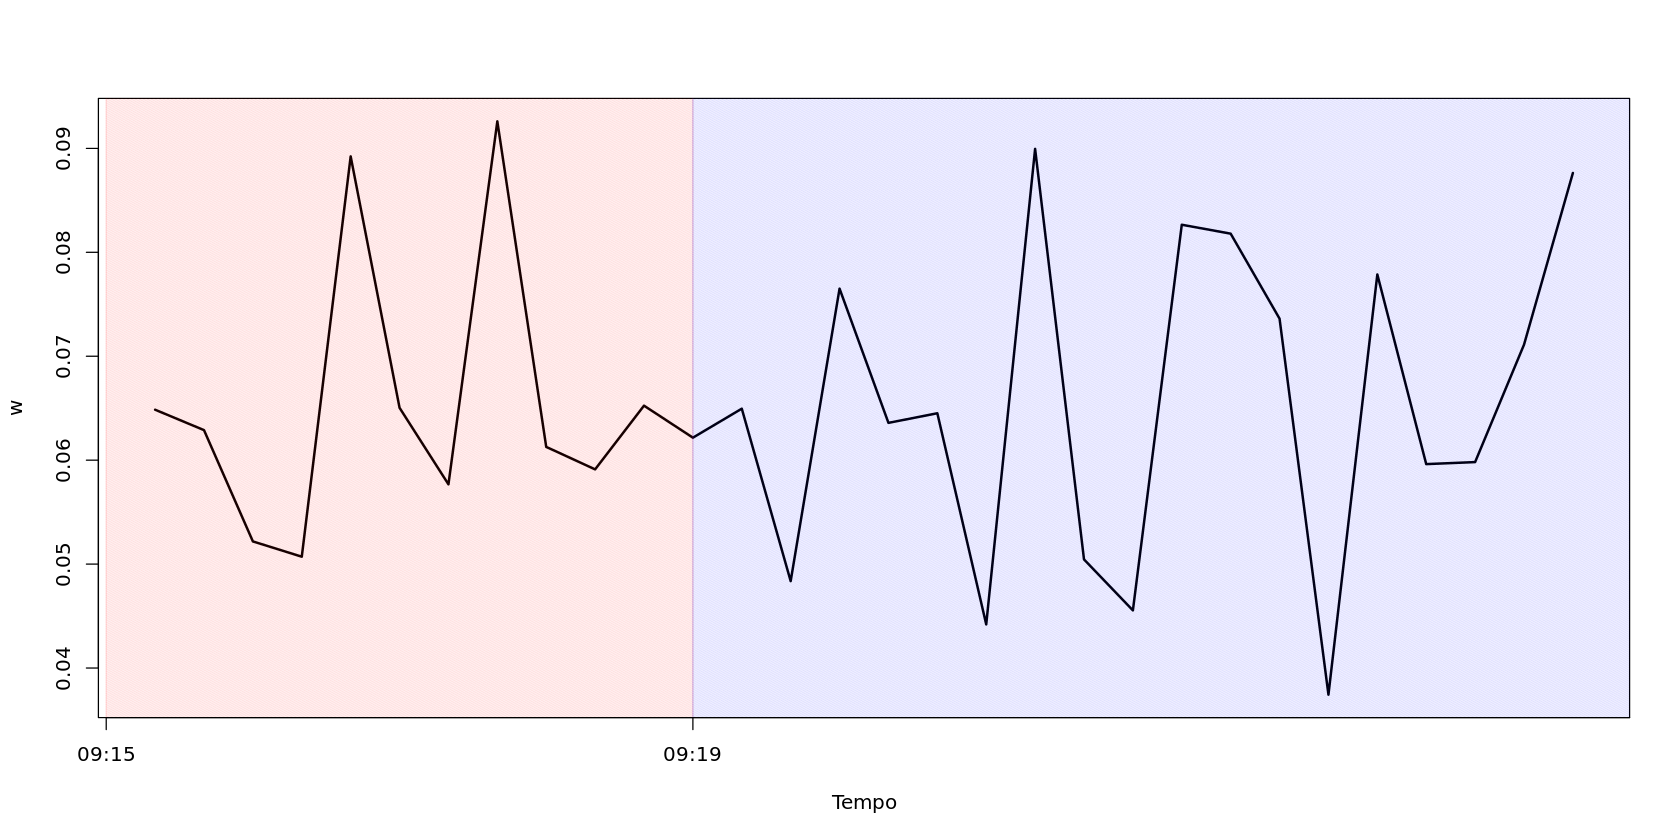

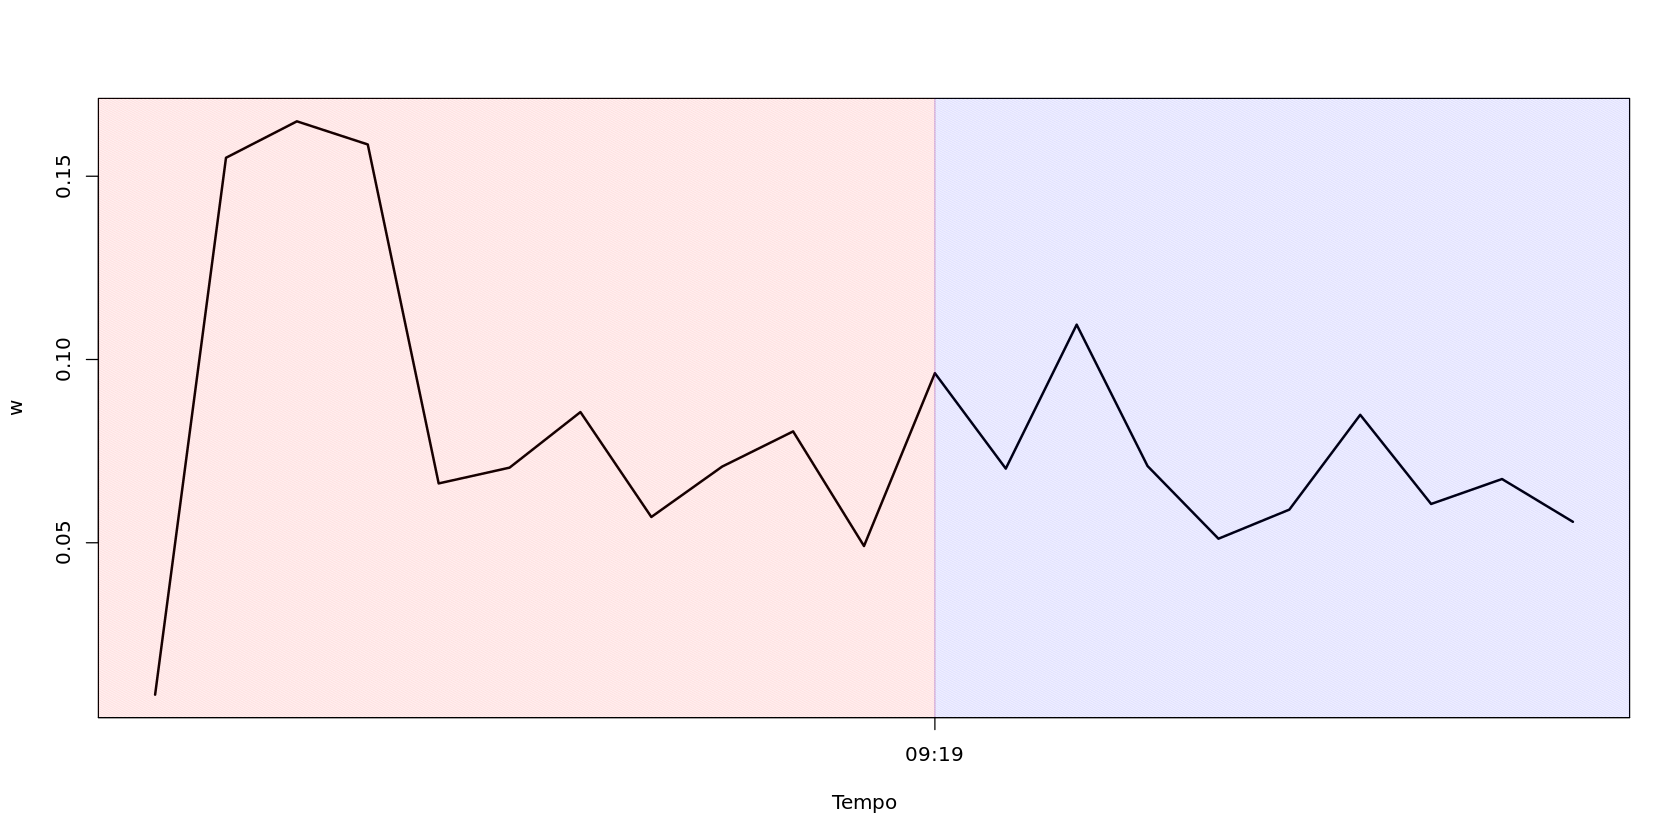

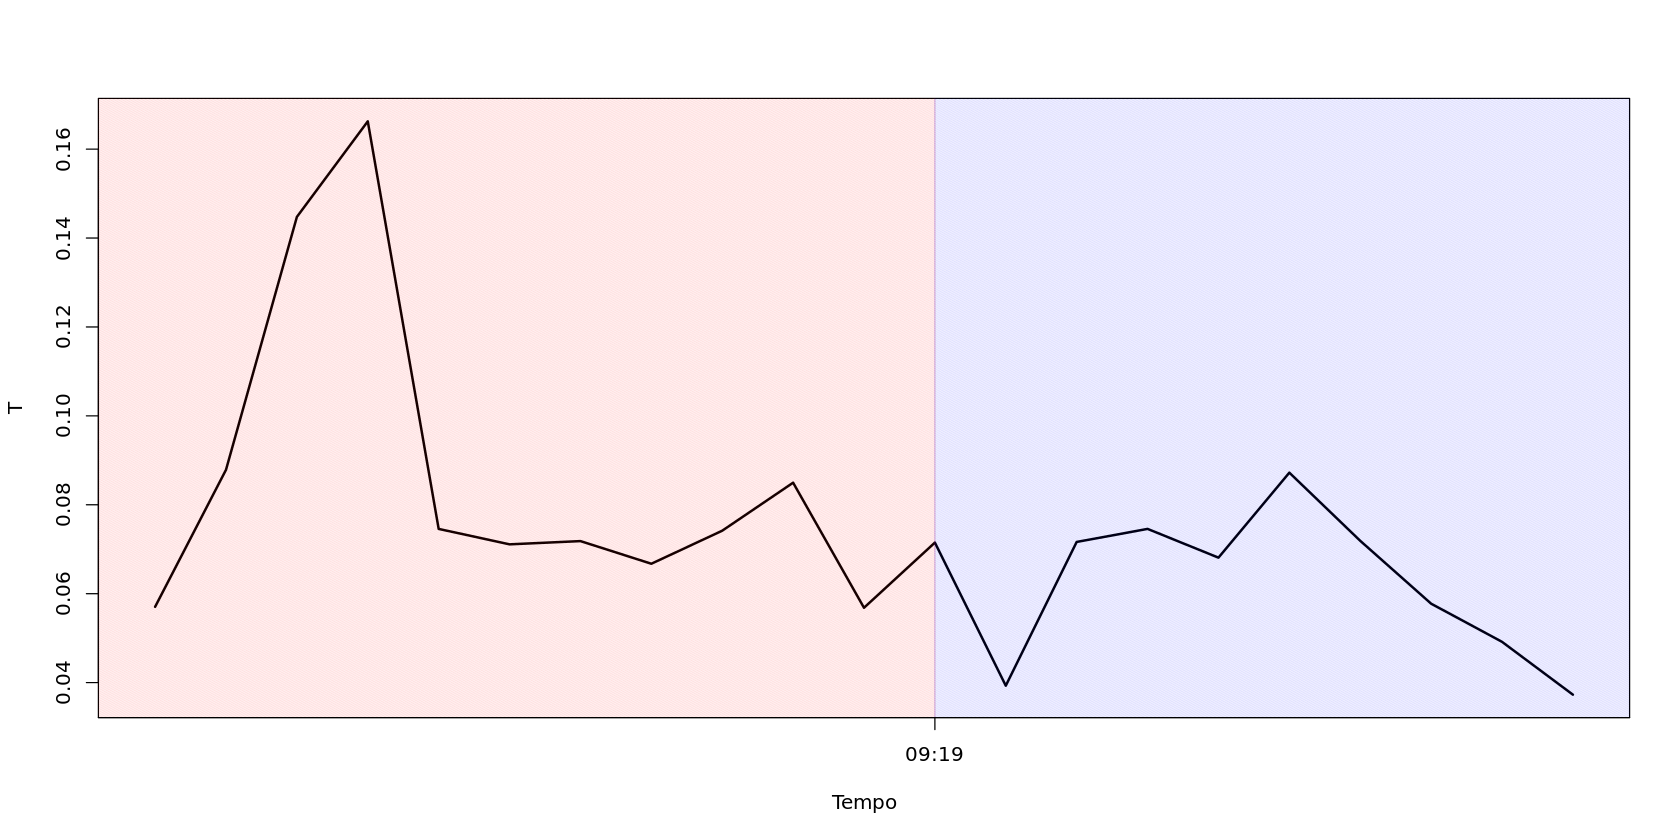

In [ ]:
dt = 20
u_t = mediatore(dt, data$u[per_2:per_3], 'w')
v_t = mediatore(dt, data$v[per_2:per_3], 'w')

u_f = mediatore(dt, data$u[per_4:per_5], 'w')
v_f = mediatore(dt, data$v[per_4:per_5], 'T')

In [ ]:
length(t_t)
length(u_t)

[1] 30

[1] 30

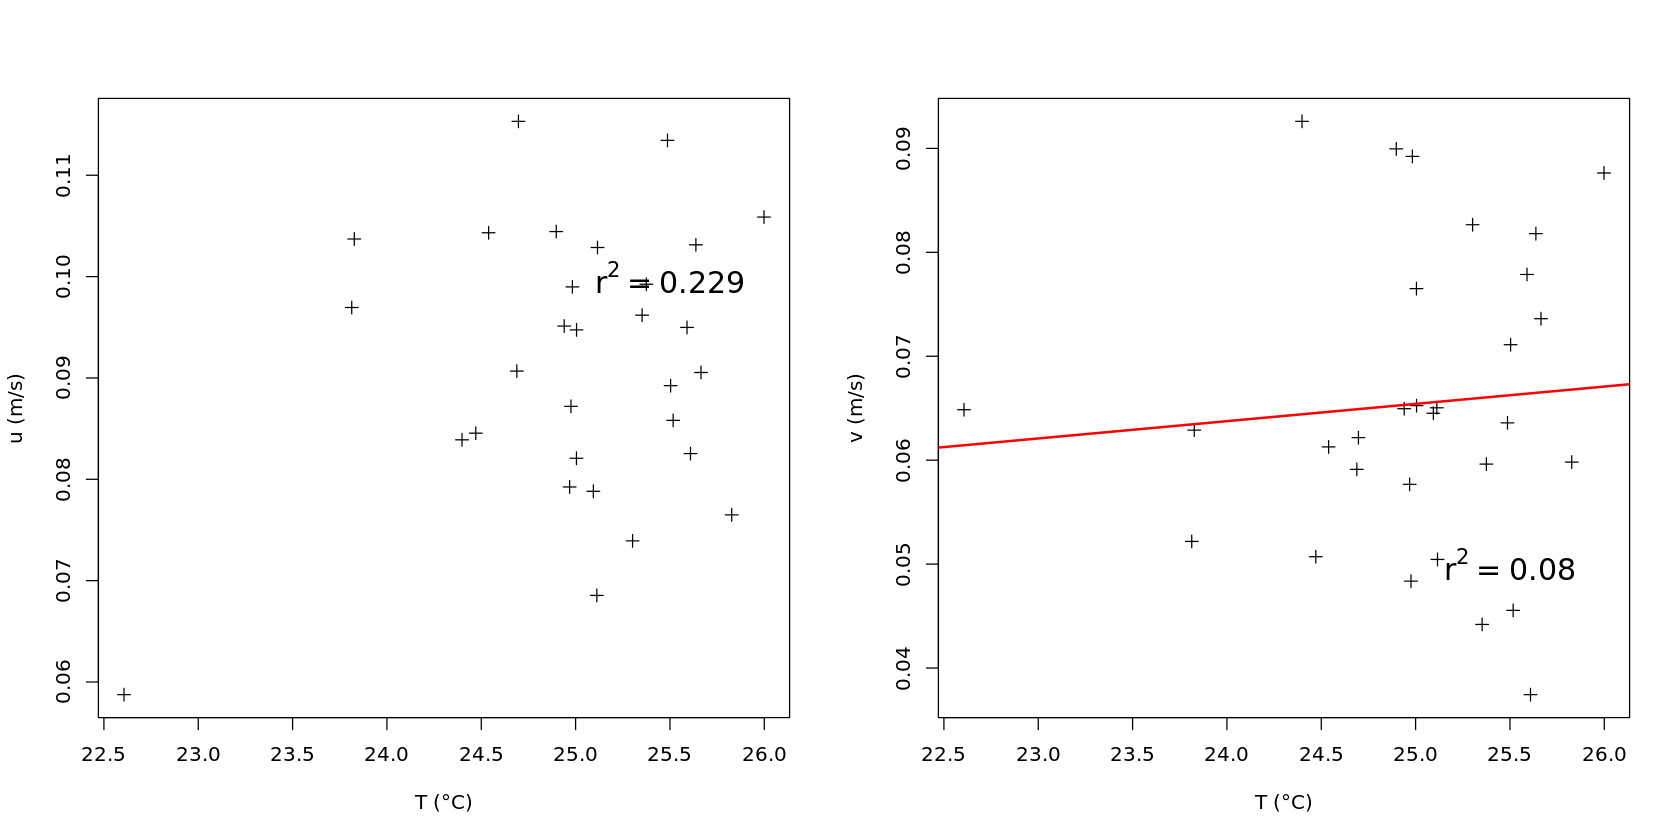

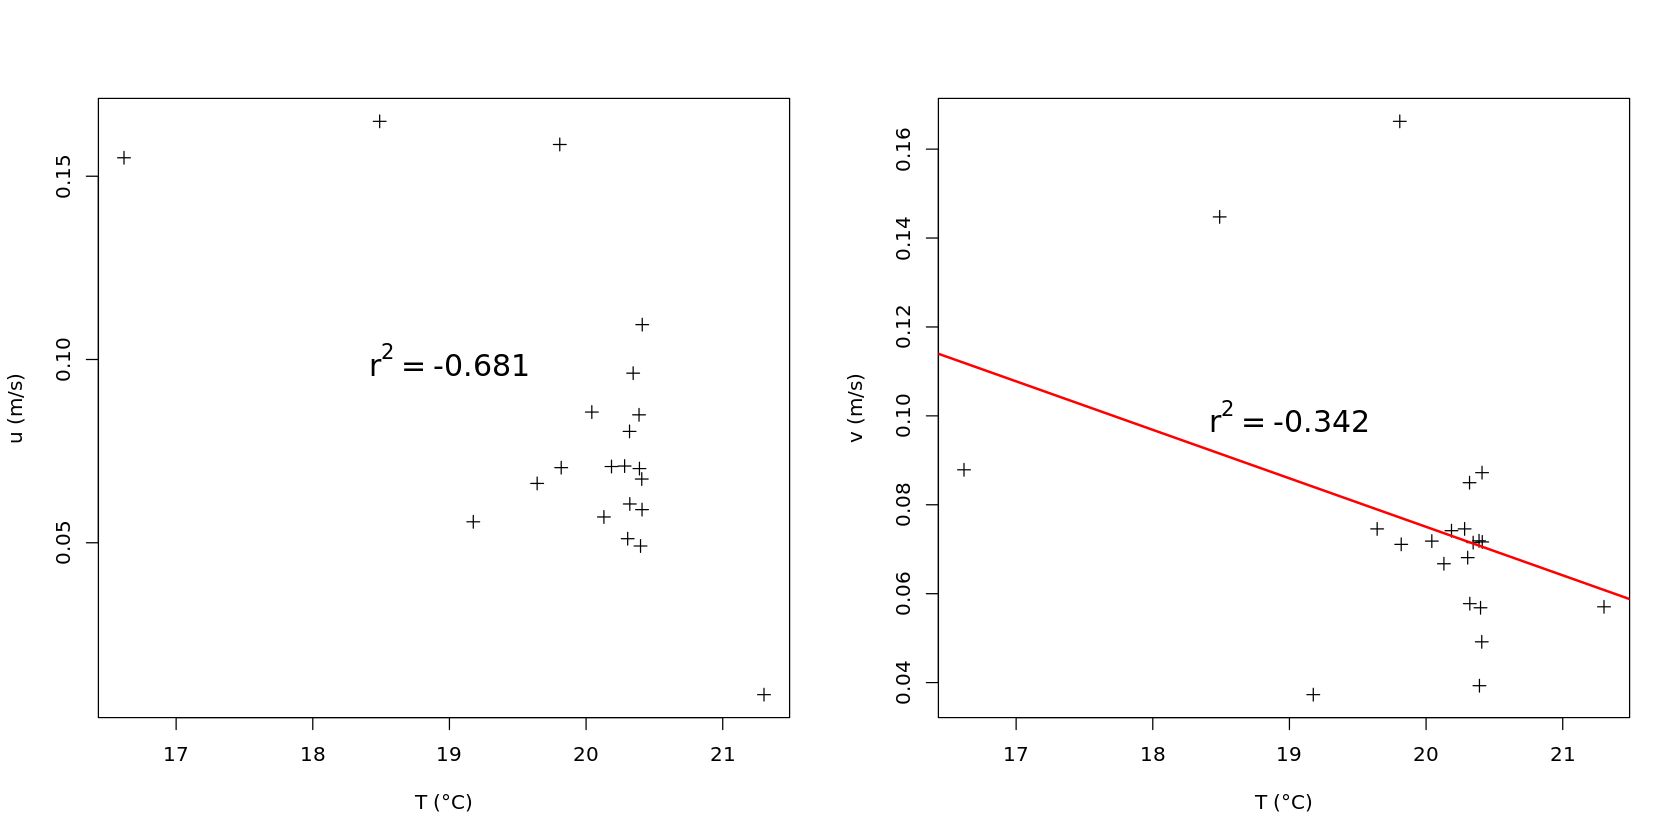

In [ ]:
# Scatterplot
options(repr.plot.width = 14, repr.plot.height = 7)
par(mfrow = c(1,2))
plot(t_t, u_t, pch = 3, xlab = 'T (°C)', ylab = 'u (m/s)')
reg = lm(t_t ~ u_t)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(-0.05,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(t_t,u_t), digits = 3)
text(25.5, 0.1, bquote(r^2 == .(R)), cex = 1.5)

# Scatterplot
plot(t_t, v_t, pch = 3, xlab = 'T (°C)', ylab = 'v (m/s)')
reg = lm(v_t ~ t_t)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(-0.05,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(t_t,v_t), digits = 3)
text(25.5,0.05,  bquote(r^2 == .(R)), cex = 1.5)


options(repr.plot.width = 14, repr.plot.height = 7)
par(mfrow = c(1,2))
plot(t_f, u_f, pch = 3, xlab = 'T (°C)', ylab = 'u (m/s)')
reg = lm(t_f ~ u_f)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(-0.05,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(t_f,u_f), digits = 3)
text(19,0.1,  bquote(r^2 == .(R)), cex = 1.5)

# Scatterplot
plot(t_f, v_f, pch = 3, xlab = 'T (°C)', ylab = 'v (m/s)')
reg = lm(v_f ~ t_f)
#intercept = round(reg$coefficients[1], digits = 2)
#slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
#text(-0.05,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(t_f,v_f), digits = 3)
text(19,0.1,  bquote(r^2 == .(R)), cex = 1.5)

## Confronto tra T sonica e T wb

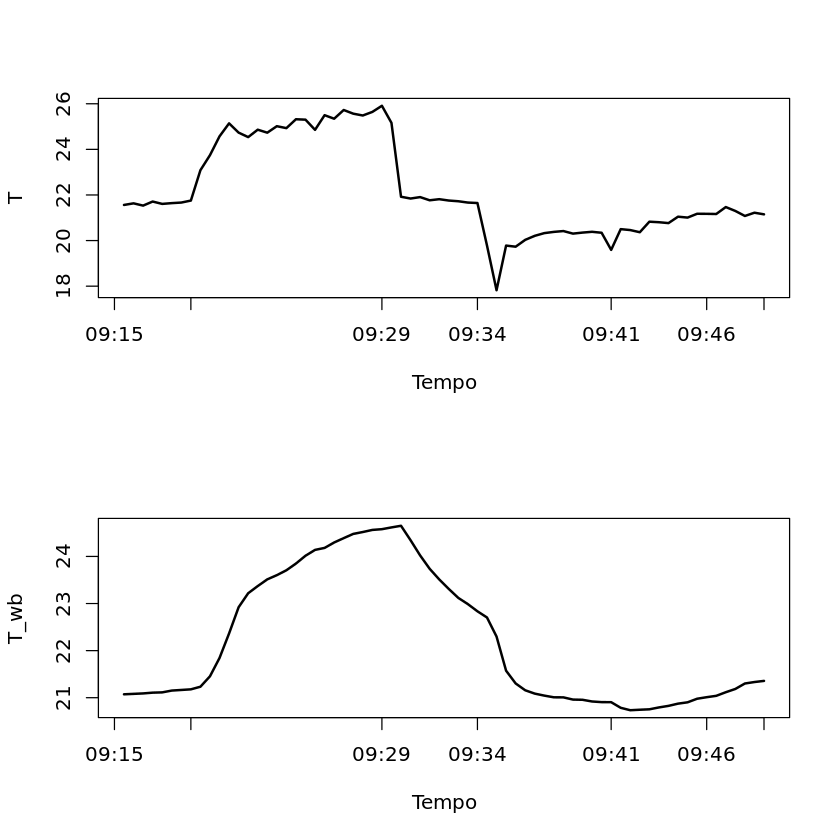

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
par(mfrow = c(2,1))
dt =  30
T.sonica = mediatore(dt, data$T.sonica, 'T')
T.wb = mediatore(dt, data$T.w, 'T_wb')

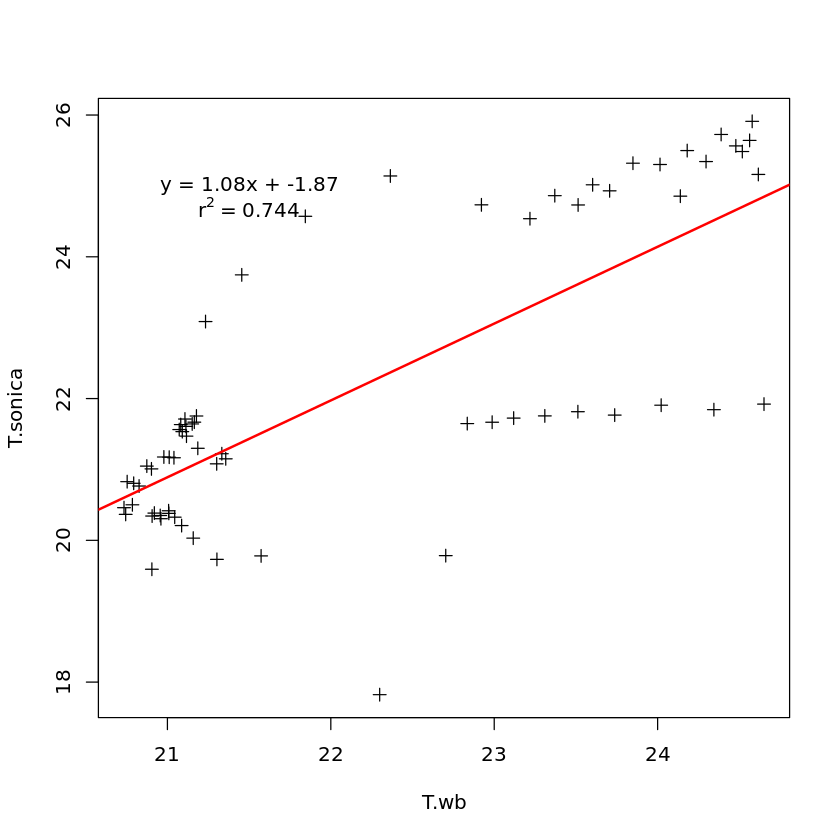

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
plot(T.wb, T.sonica, pch = 3)
reg = lm(T.sonica ~ T.wb)

intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
abline(reg, col = 'red', lwd = 2)
text(21.5,25, paste0('y = ', slope, 'x + ', intercept))
R = round(cor(T.wb,T.sonica), digits = 3)
text(21.5, 24.7, bquote(r^2 == .(R)))

## Calcolo T virtuale

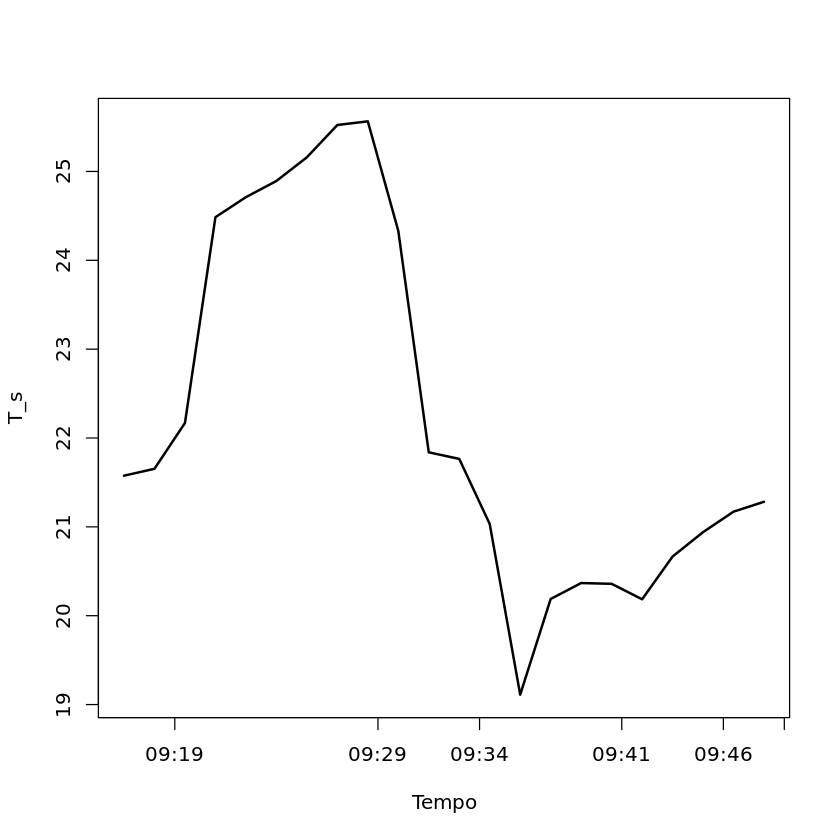

In [ ]:
T_s = mediatore(90, data$T.sonica, 'T_s')

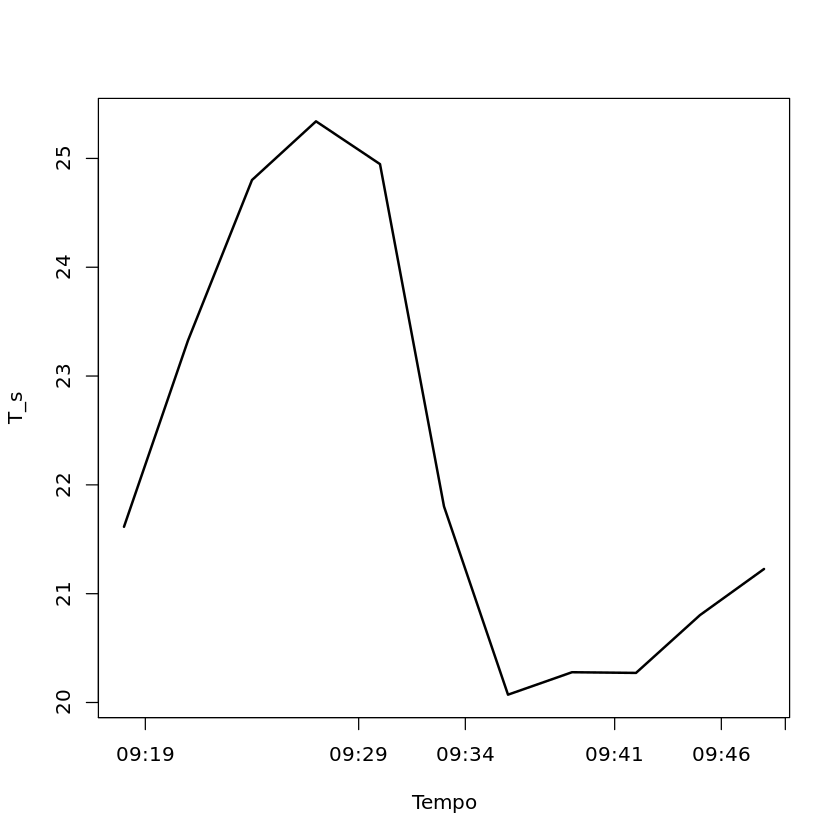

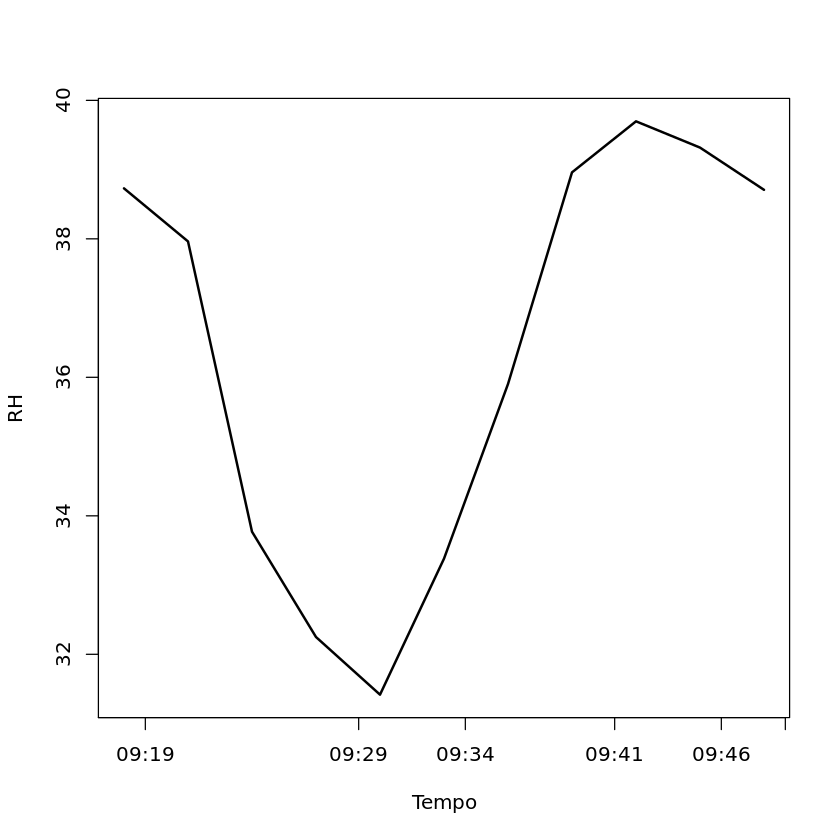

[1] 11

T_w,T_s,w,RH
21.10289,21.61494,0.0064,38.72878
21.53983,23.32722,0.0070,37.96256
23.38883,24.80172,0.0074,33.77067
24.14478,25.34089,0.0064,32.24917
24.56767,24.94767,0.0062,31.41700
23.67400,21.80178,0.0048,33.38133
22.28350,20.07189,0.0052,35.90328
21.04433,20.27811,0.0058,38.96017
20.86789,20.27183,0.0059,39.69700
20.81583,20.80328,0.0058,39.31772


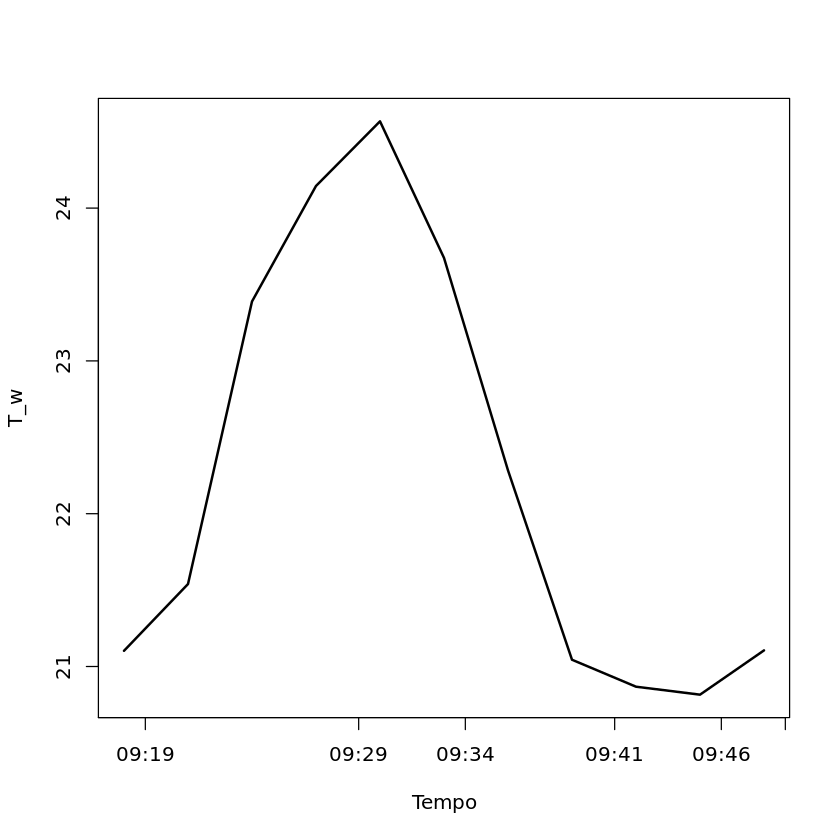

In [ ]:
dt = 180
T_s = mediatore(dt, data$T.sonica, 'T_s')
RH = mediatore(dt, data$RH , 'RH')
T_w = mediatore(dt, data$T.w, 'T_w')

length(T_w)

w = c(0.0064, 0.007, 0.0074, 0.0064, 0.0062, 0.0048, 0.0052, 0.0058, 0.0059, 0.0058, 0.006 )

data_s <- matrix(c(T_w, T_s, w, RH), ncol=4)
colnames(data_s) <- c("T_w", "T_s", "w", "RH")
data_s

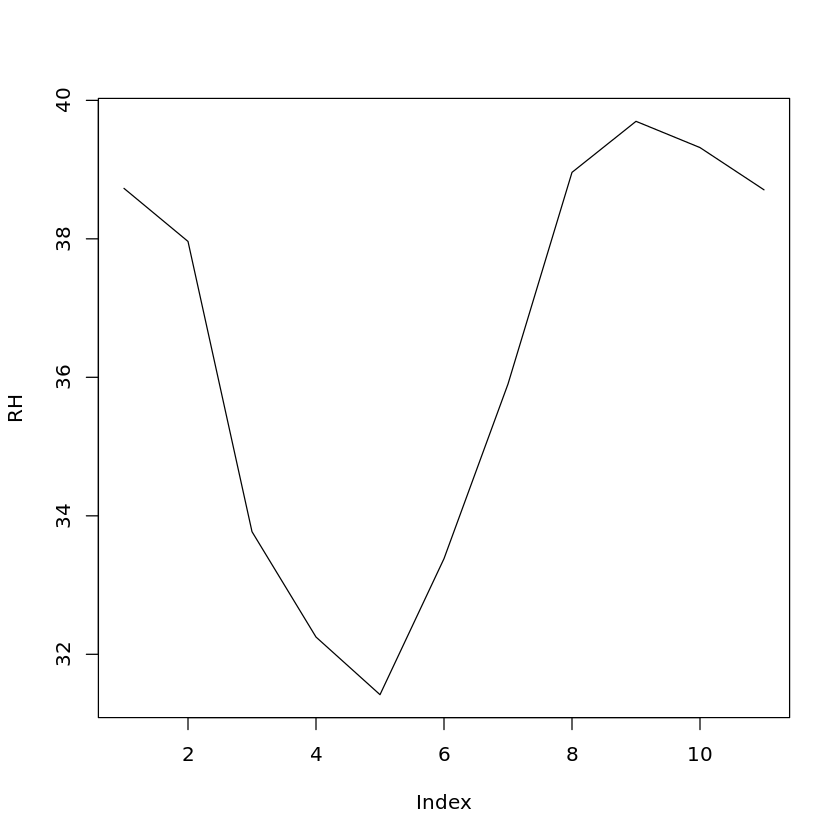

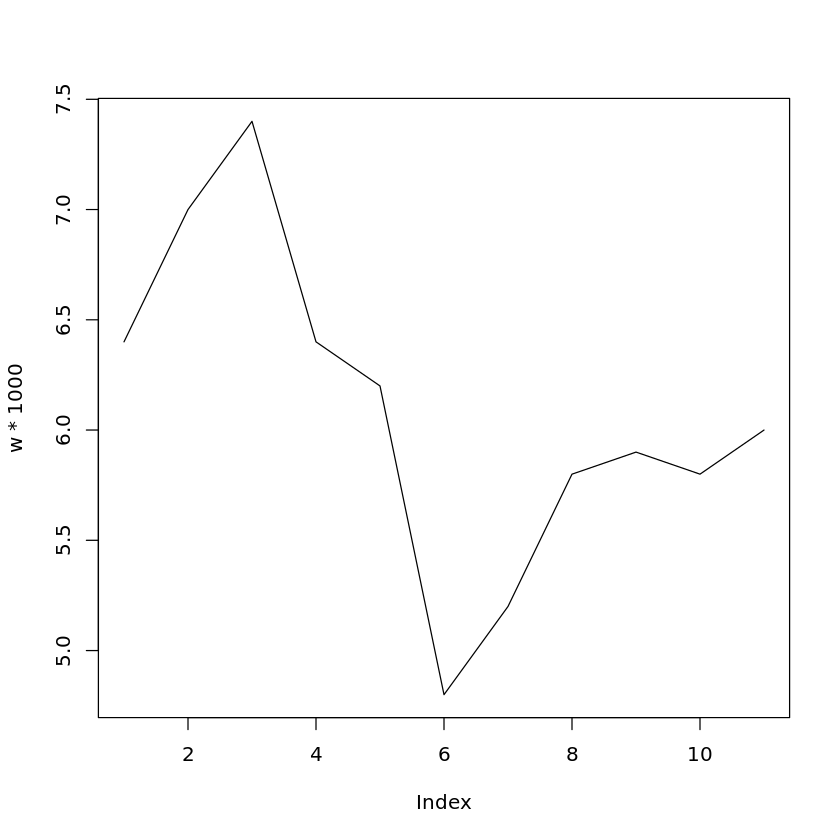

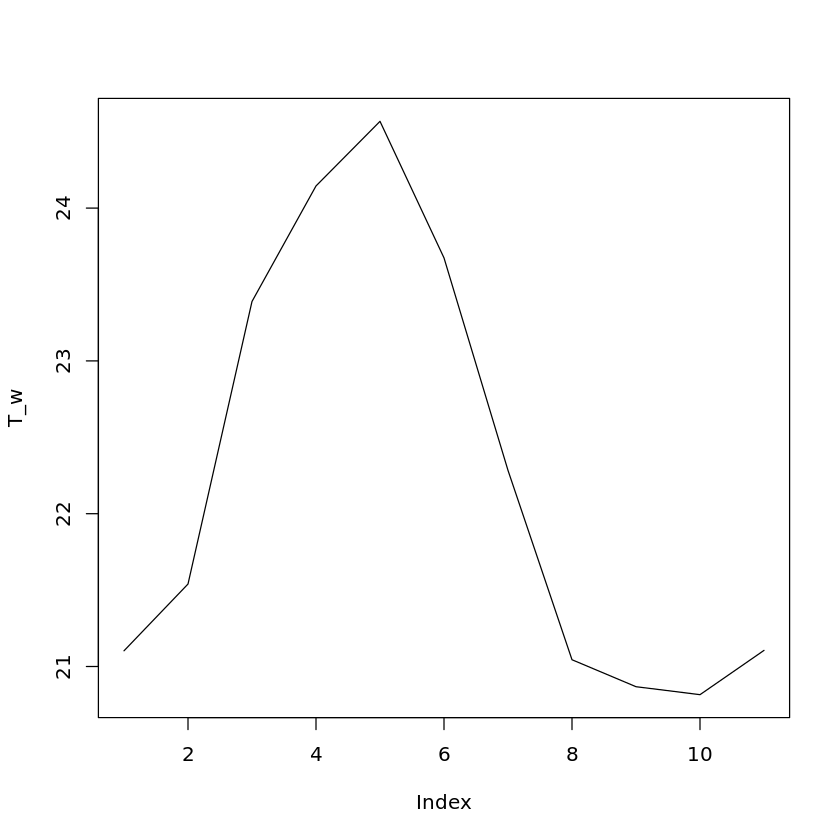

In [ ]:
plot(RH, type = 'l')
plot(w*1000, type = 'l')
plot(T_w, type = 'l')

In [ ]:
eps = 0.622
mixing_ratio = c()

T.virt = function(T, mixing_ratio) {
    return(T * (1 + mixing_ratio/0.622)/(1 + mixing_ratio))
}

T_v = T.virt(data_s[,1], data_s[,3])

data_s = cbind(data_s, T_v)
data_s

T_w,T_s,w,RH,T_v
21.10289,21.61494,0.0064,38.72878,21.18444
21.53983,23.32722,0.0070,37.96256,21.63083
23.38883,24.80172,0.0074,33.77067,23.49324
24.14478,25.34089,0.0064,32.24917,24.23809
24.56767,24.94767,0.0062,31.41700,24.65966
23.67400,21.80178,0.0048,33.38133,23.74273
22.28350,20.07189,0.0052,35.90328,22.35355
21.04433,20.27811,0.0058,38.96017,21.11808
20.86789,20.27183,0.0059,39.69700,20.94227
20.81583,20.80328,0.0058,39.31772,20.88878


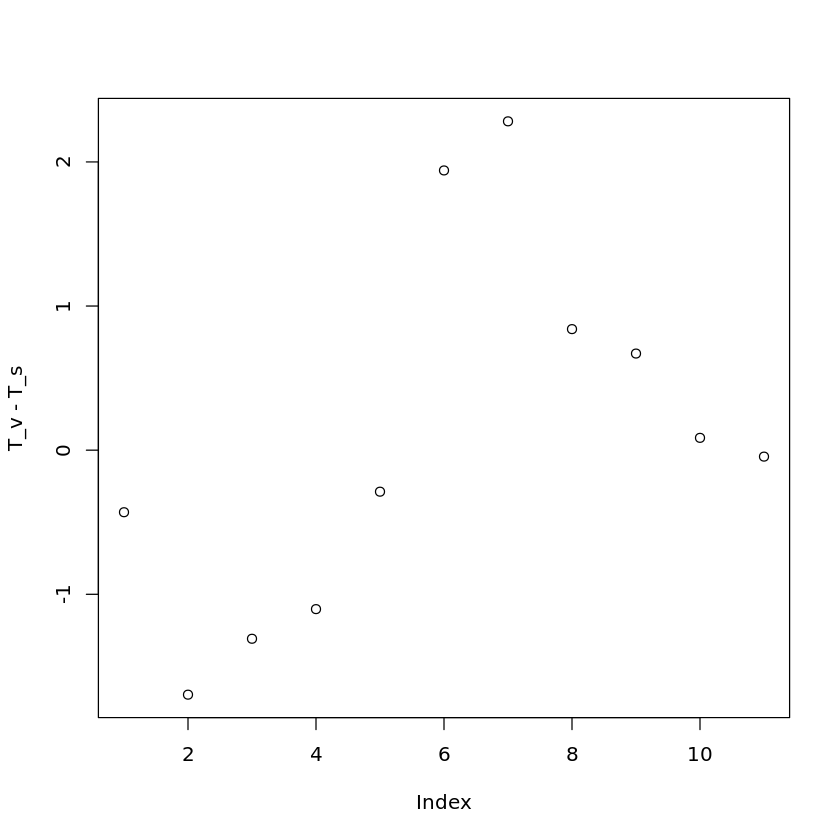

In [ ]:
plot(T_v-T_s)

In [ ]:
pdf("temperature_prova.pdf", width = 14, height = 7)
options(repr.plot.width = 14, repr.plot.height = 7 )
par(mar = c(5,6,4,4))
plot(data_s[,1], xlim = c(1,11), ylim= c(20, 26), lwd = 2, type = 'l', col = 'red', ylab = 'Temperatura (°C)', xlab = 'Tempo', xaxt = 'n', cex.lab = 1.5, cex.axis = 1.2)
lines(data_s[,2], col = 'green', lwd = 2)
lines(data_s[,5], col = 'blue', lwd = 2)

legend('topright', lty = c(1,1,1), col = c('red', 'blue', 'green'), legend = c('T termometro', 'T virtuale', 'T sonica'),
        bty = 'n', cex = 1.5, lwd = 2 )
axis(1, seq(1,11,1), format(data$TIMESTAMP[seq(1,dim(data)[1], round(dim(data)[1]/dim(data_s)[1]))], '%H:%M'))
dev.off()

png 
  2

In [ ]:
seq(1,dim(data)[1]+186, round(dim(data)[1]/dim(data_s)[1]))

[1]    1  187  373  559  745  931 1117 1303 1489 1675 1861 2047

## PROVA DI MEDIA MOBILE

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d20f4b9-dab0-4689-bc9f-99274b540f7e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>